# QDC Challenge Q8 Customer Data

In [1]:
#Jupyter Notebook
"""Created on Sat Nov 27 15:48:59 2021 Team 13 QDC Report"""

In [2]:
#%% Importing Packages
print('Start of Script')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math

Start of Script


# Table of Contents
#### I. File imports 
#### II. Data cleaning & Exploratory Data Analysis Anagrafica
#### III. Data cleaning & Exploratory Data Analysis Refuelling Dataset
#### IV. Data cleaning & EDA Prize Dataset
#### V. Merging
#### VI. K-Means RFM Model
#### VII. Logistic Regression

## I. File imports for Anagrafica, PremiClub and Reinformenti Carburante

#### Refuel Dataset N=12M

In [3]:
#%%
# Import Rifornimenti File data on Refueling, change drive location!
#specify Path where file is located
data_file = "GBAC_data/"
#Specify dataset
file = data_file + "Rifornimenti_Carburante_ClubQ8.csv"
Refuel = pd.read_csv(file, delimiter=(";"))
# Data Cleaning
print(Refuel.head())

        COD_PAN_DA_POS  COD_PV      DATA_OPERAZIONE                 PRODOTTO  \
0  7071161603600606750     584  2021-03-01 00:00:57           CARICO GASOLIO   
1  7071161603000039982     155  2021-03-01 00:02:53           CARICO GASOLIO   
2  7071161603000720656    4803  2021-03-01 00:03:10           CARICO GASOLIO   
3  7071161603014646483    2491  2021-03-01 00:05:45  CARICO HIPERFORM DIESEL   
4  7071161603011692357    8265  2021-03-01 00:07:29               CARICO GPL   

  MODALITA_VENDITA  LITRI  PUNTI_CARBURANTE  
0             EASY      7                 3  
1             SELF     17                17  
2              OPT     39                19  
3          SERVITO     54                54  
4          SERVITO     31                31  


#### Anagrafica dataset (Customer characteristics) N=1.6M

In [4]:
#%%
data_file2 ="GBAC_data/"
#Specify dataset
file2 = data_file2 + "Anagrafica_ClubQ8.csv"
Ana = pd.read_csv(file2, delimiter=(";"))
print(Ana.head())

        COD_PAN_DA_POS SEX         DATA_NASCITA   REGIONE PROVINCIA   COMUNE  \
0  7071161603018922195   M  1951-09-14 00:00:00     LAZIO   VITERBO    SUTRI   
1  7071161603005992565   F  1988-09-15 00:00:00       NaN       NaN      NaN   
2  7071161603025867243   F  1943-09-09 00:00:00     LAZIO      ROMA     ROMA   
3  7071161603021997861   M  1974-03-01 00:00:00   SICILIA   MESSINA  MESSINA   
4  7071161603025554049   M  1963-11-22 00:00:00  CAMPANIA   SALERNO    EBOLI   

      TIPO_CARTA       DATA_BATTESIMO SALDO_PUNTI  
0  STARQ8_FISICA  2015-01-08 12:32:58  511,000000  
1  STARQ8_FISICA  2020-07-10 12:22:35  379,000000  
2  STARQ8_FISICA  2020-07-10 18:07:14  108,000000  
3  STARQ8_FISICA  2020-07-10 18:08:21  100,000000  
4  STARQ8_FISICA  2020-07-10 18:09:27  284,000000  


#### Prizes Dataset N=500k

In [5]:
#%%
#Specify dataset
file3 = data_file + "Premi_ClubQ8.csv"
Prize = pd.read_csv(file3, delimiter=(";"))
Prize

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,COD_PAN_DA_POS,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA
0,7071161603670014604,2020-09-01 00:16:21,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
1,7071161603670014604,2020-09-01 00:17:30,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
2,7071161603670014604,2020-09-01 00:18:49,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
3,7071161603670014604,2020-09-01 00:19:42,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000"
...,...,...,...,...,...,...,...,...
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,"0,000000"
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,"30,000000"
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,"15,000000"
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,"0,000000"


### Initial Data Cleaning - Renaming columns

In [6]:
#%%
Prize = Prize.rename(columns={'COD_PAN_DA_POS': 'CustomerCode'})
Prize = Prize.rename(columns={'DATA_OPERAZIONE': 'RequestDate'})
Prize = Prize.rename(columns={'LUOGO_PRENOTAZIONE_PREMIO': 'RequestPlace'})
Prize = Prize.rename(columns={'CATEGORIA': 'Category'})
Prize = Prize.rename(columns={'DESCRIZIONE': 'PrizeDescript'})
Prize = Prize.rename(columns={'RAGGRUPPAMENTO_MERCEOLOGICO': 'MaterialGrouping'})
Prize = Prize.rename(columns={'CONTRIBUTO_CLIENTE_CON_IVA': 'ClientContribution'})
Prize = Prize.rename(columns={'PUNTI_RICHIESTI': 'PointsRequired'})
#%%
Prize.head()
#%%

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution
0,7071161603670014604,2020-09-01 00:16:21,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
1,7071161603670014604,2020-09-01 00:17:30,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
2,7071161603670014604,2020-09-01 00:18:49,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
3,7071161603670014604,2020-09-01 00:19:42,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000"


In [7]:
#%%
from datetime import datetime
Refuel = Refuel.rename(columns={'COD_PAN_DA_POS': 'CustomerCode'})
Refuel = Refuel.rename(columns={'COD_PV': 'GasStatCode'})
Refuel = Refuel.rename(columns={'LITRI': 'Litres'})
Refuel = Refuel.rename(columns={'PUNTI_CARBURANTE': 'GasLoyaltyPoints'})
Refuel = Refuel.rename(columns={'MODALITA_VENDITA': 'SalesModality'})
Refuel = Refuel.rename(columns={'PRODOTTO': 'Product'})
Refuel = Refuel.rename(columns={'DATA_OPERAZIONE': 'TransactionDate'})

In [8]:
#Now Renaming columns in Ana Dataset
from datetime import datetime
Ana["DATA_BATTESIMO"]= pd.to_datetime(Ana["DATA_BATTESIMO"])
Ana["DATA_NASCITA"]= pd.to_datetime(Ana["DATA_NASCITA"])
Ana[['First','Last']] = Ana["SALDO_PUNTI"].str.split(",",expand=True)
Ana = Ana.drop(columns=['Last','SALDO_PUNTI']) # include just the value of zero, so drop it
Ana = Ana.rename(columns={'COD_PAN_DA_POS':'CustomerCode'})
Ana = Ana.rename(columns={'First':'PointsBalance'})
Ana = Ana.rename(columns={'DATA_NASCITA':'DateOfBirth'})
Ana = Ana.rename(columns={'DATA_BATTESIMO':'DateJoined'})
Ana = Ana.rename(columns={'TIPO_CARTA':'LoyaltyCard'})
Ana["SALDO_PUNTI"] = Ana["PointsBalance"].astype(float)
Ana = Ana.drop("SALDO_PUNTI",axis=1)
Ana

,CustomerCode,SEX,DateOfBirth,REGIONE,PROVINCIA,COMUNE,LoyaltyCard,DateJoined,PointsBalance
0,7071161603018922195,M,1951-09-14,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511
1,7071161603005992565,F,1988-09-15,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379
2,7071161603025867243,F,1943-09-09,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108
3,7071161603021997861,M,1974-03-01,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100
4,7071161603025554049,M,1963-11-22,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284
...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741
1656133,7071161603673015798,M,1967-03-19,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996
1656134,7071161603024035909,M,1987-03-18,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424
1656135,7071161603601002132,F,1984-09-20,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740


In [9]:
#%%
Refuel

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,EASY,7,3
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,SELF,17,17
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,OPT,39,19
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,SERVITO,54,54
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,SERVITO,31,31
...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,SELF,50,50
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,EASY,12,6
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,OPT,9,4
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,SERVITO,50,50


In [10]:
#%%
Refuel["TransactionDate"]= pd.to_datetime(Refuel["TransactionDate"], format="%Y-%m-%d %H:%M:%S")
Refuel["TransactionDate"] = Refuel["TransactionDate"].astype('datetime64[ns]')
Refuel["TransactionDate"]
Refuel["TransactionDate"].describe()
Refuel['GasStatCode']=Refuel['GasStatCode'].astype(object)

<ipython-input-10-4c87b503747c>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Refuel["TransactionDate"].describe()


In [11]:
Refuel['CustomerCode'].value_counts()
#Top customer refueled 265 times

7071161603001989086    265
7071161603670007327    231
7071161603021890256    225
7071161603601202773    219
7071161603600566012    210
                      ... 
7071161603004333886      1
7071161603022757892      1
7071161603022741532      1
7071161603004189569      1
7071161603033986902      1
Name: CustomerCode, Length: 957357, dtype: int64

In [12]:
Prize['CustomerCode'].value_counts()
#Top customer bought 112 different prizes

7071161603672763422    112
7071161603672966256     75
7071161603004347001     64
7071161603670189760     55
7071161603670189448     51
                      ... 
7071161603002854958      1
7071161603002328623      1
7071161603012808234      1
7071161603011763752      1
7071161603004086666      1
Name: CustomerCode, Length: 229882, dtype: int64

In [13]:
Ana['CustomerCode']=Ana['CustomerCode'].apply(str)


In [14]:
Ana['CustomerCode'].value_counts()

7071161603008408429    1
7071161603013882980    1
7071161603006864367    1
7071161603018925743    1
7071161603013708979    1
                      ..
7071161603007487341    1
7071161603005274006    1
7071161603014293963    1
7071161603013493770    1
7071161603601081714    1
Name: CustomerCode, Length: 1656137, dtype: int64

## II. Data Cleaning and Exploratory Data Analysis With Anagrafica Dataset 

In [15]:
Ana['CustomerCode'].describe()

count                 1656137
unique                1656137
top       7071161603008408429
freq                        1
Name: CustomerCode, dtype: object

In [16]:
#%%
Ana.info() # different types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656137 entries, 0 to 1656136
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   CustomerCode   1656137 non-null  object        
 1   SEX            1656136 non-null  object        
 2   DateOfBirth    1656137 non-null  datetime64[ns]
 3   REGIONE        1534328 non-null  object        
 4   PROVINCIA      1534328 non-null  object        
 5   COMUNE         1534328 non-null  object        
 6   LoyaltyCard    1656137 non-null  object        
 7   DateJoined     1655941 non-null  datetime64[ns]
 8   PointsBalance  1627207 non-null  object        
dtypes: datetime64[ns](2), object(7)
memory usage: 113.7+ MB


In [17]:
#%%
Ana.isnull().mean()# very few missing value percentage, so just drop them
Ana = Ana.dropna()
Ana.shape # still huge amount of rows
Ana["SEX"].value_counts() # more male than female in observed value
Ana["SEX"] = Ana["SEX"].map({"M":0,"F":1}) # map male and female into 0 and 1
#%%
f = Ana["REGIONE"].value_counts()

<ipython-input-17-224e4bfab83e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ana["SEX"] = Ana["SEX"].map({"M":0,"F":1}) # map male and female into 0 and 1


In [18]:
Ana

,CustomerCode,SEX,DateOfBirth,REGIONE,PROVINCIA,COMUNE,LoyaltyCard,DateJoined,PointsBalance
0,7071161603018922195,0,1951-09-14,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511
2,7071161603025867243,1,1943-09-09,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108
3,7071161603021997861,0,1974-03-01,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100
4,7071161603025554049,0,1963-11-22,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284
5,7071161603001130830,1,2000-01-23,PIEMONTE,TORINO,TORINO,STARQ8_FISICA,2020-07-10 18:12:31,175
...,...,...,...,...,...,...,...,...,...
1656131,7071161603601085723,0,1998-06-20,LIGURIA,LA SPEZIA,LA SPEZIA,STARQ8_VIRTUALE,2021-01-18 22:40:56,50
1656132,7071161603672630225,1,1962-06-22,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741
1656133,7071161603673015798,0,1967-03-19,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996
1656134,7071161603024035909,0,1987-03-18,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424


In [19]:
Ana['DateJoined'].describe()
#one value 11 times? is that normal

<ipython-input-19-9f7330590ac2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Ana['DateJoined'].describe()


count                 1507140
unique                1474779
top       2001-10-05 18:20:00
freq                       11
first     2000-01-01 00:00:00
last      2021-09-19 22:00:27
Name: DateJoined, dtype: object

In [20]:
Ana['DaysLoyal']= pd.to_datetime("now")-Ana['DateJoined']

<ipython-input-20-98d57dba6f93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ana['DaysLoyal']= pd.to_datetime("now")-Ana['DateJoined']


In [21]:
# Create column that estimate how long ago since customer joined
from datetime import datetime
Ana['DLoyal'] = Ana['DaysLoyal'].dt.total_seconds()/60/60/24
Ana=Ana.drop(columns=['DaysLoyal','DateJoined'])
Ana

<ipython-input-21-ccc065102e3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ana['DLoyal'] = Ana['DaysLoyal'].dt.total_seconds()/60/60/24


,CustomerCode,SEX,DateOfBirth,REGIONE,PROVINCIA,COMUNE,LoyaltyCard,PointsBalance,DLoyal
0,7071161603018922195,0,1951-09-14,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511,2564.370103
2,7071161603025867243,1,1943-09-09,LAZIO,ROMA,ROMA,STARQ8_FISICA,108,554.137974
3,7071161603021997861,0,1974-03-01,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100,554.137198
4,7071161603025554049,0,1963-11-22,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284,554.136434
5,7071161603001130830,1,2000-01-23,PIEMONTE,TORINO,TORINO,STARQ8_FISICA,175,554.134305
...,...,...,...,...,...,...,...,...,...
1656131,7071161603601085723,0,1998-06-20,LIGURIA,LA SPEZIA,LA SPEZIA,STARQ8_VIRTUALE,50,361.947904
1656132,7071161603672630225,1,1962-06-22,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2741,780.138471
1656133,7071161603673015798,0,1967-03-19,LAZIO,ROMA,ROMA,STARQ8_FISICA,8996,1031.535705
1656134,7071161603024035909,0,1987-03-18,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,424,361.512707


In [22]:
# We are going to want an integer value, floor to make the amount of days more accurate
Ana['DLoyal'] = Ana['DLoyal'].apply(np.floor)

In [23]:
#%%
#ind = f.index
#a = pd.DataFrame({"Re":ind,"Num":f})
#fig = plt.figure(figsize=(20,8))
#plt.bar(a["Re"],a["Num"])
#plt.xticks(rotation = -15); # different regions in the file, most them came from LOMBARDIA

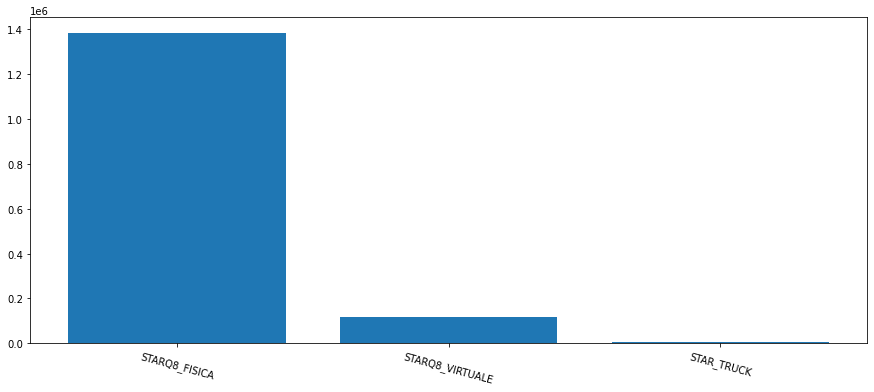

In [24]:
#%%
b = pd.DataFrame({"Num":Ana["LoyaltyCard"].value_counts(),"ind":Ana["LoyaltyCard"].value_counts().index})
fig = plt.figure(figsize=(15,6))
plt.bar(b["ind"],b["Num"])
plt.xticks(rotation = -15);# different loyalty_card values in the file, most them are STARQ8_FISICA

<ipython-input-25-c9f8b1fab784>:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Ana["DateOfBirth"].describe()


count                 1507140
unique                  28166
top       1980-01-01 00:00:00
freq                     1825
first     1900-02-09 00:00:00
last      2019-05-30 00:00:00
Name: DateOfBirth, dtype: object

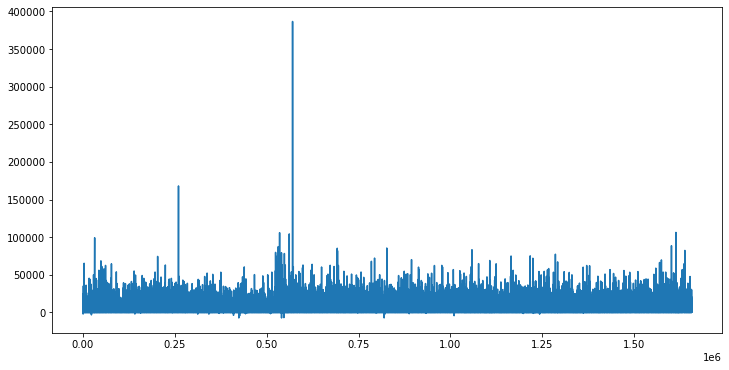

In [25]:
#%%
Ana["PointsBalance"].describe()
Ana["PointsBalance"]= Ana["PointsBalance"].astype("int") # transfer the d-type of pointbalance columns into int and visualize it
Ana["PointsBalance"].plot(kind="line",figsize=(12,6)); # some extreme value in this column
Ana["PointsBalance"].sort_values(ascending=False) # only the maximum looks like a abnormal value, exist probably due to some error
Ana["PointsBalance"].drop(index=570459,inplace=True) # Drop the extreme value
Ana["DateOfBirth"].describe()
# last= 2019?? Firs=1900?? this is strange?

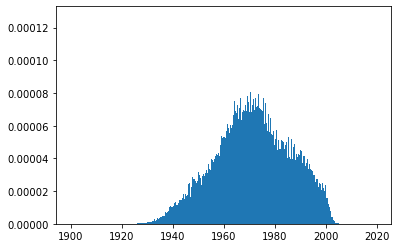

In [26]:
plt.hist(x='DateOfBirth', data=Ana, bins=3000, density=True);
#seems fine

In [27]:
Ana['DateOfBirth'].value_counts()
#1825 occurances seem rather unlikely, we are going to assume that this is a standard date.
#1st of january 1980 looks like a typical standard date.
#1825 occurances from 1.5 million data points is rather low so we can drop this.

1980-01-01    1825
1961-05-14     239
1965-01-01     205
1999-11-24     203
1967-01-01     187
              ... 
1929-06-03       1
2004-06-13       1
1929-01-10       1
2008-08-01       1
1900-02-09       1
Name: DateOfBirth, Length: 28166, dtype: int64

In [28]:
Ana.drop(Ana.index[Ana['DateOfBirth'] == '1980-01-01'], inplace=True)

In [29]:
Ana.shape

(1505315, 9)

In [30]:
Ana['DateOfBirth'].value_counts()
#looks good now.

1961-05-14    239
1965-01-01    205
1999-11-24    203
1967-01-01    187
1962-05-13    183
             ... 
1904-01-26      1
1932-08-17      1
1902-08-13      1
1924-12-20      1
1923-03-27      1
Name: DateOfBirth, Length: 28165, dtype: int64

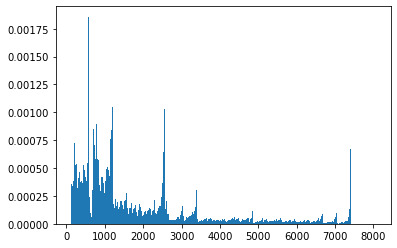

In [31]:
plt.hist(x='DLoyal', data=Ana, bins=1000, density=True);
# some extreme observations but we will not make any decisions here.

In [32]:
import datetime as dt
age = datetime.today().year - Ana["DateOfBirth"].dt.year
#%%
Ana["Age"] = age # Add a new column named 'age'
#%%
mat = {'STARQ8_FISICA':1,'STARQ8_VIRTUALE':2,'STAR_TRUCK':3}
Ana["LoyaltyCard"] = Ana["LoyaltyCard"].map(mat) # map the three different products into 1 2 and 3

In [33]:
#%% We Temporarily Delete Province and commune information, focus on Regions
from sklearn.preprocessing import LabelEncoder
#%%
#%%
d_col = ['PROVINCIA','COMUNE']
Ana.drop(d_col,axis=1,inplace=True) # Since there are three geographical features, left only one
#%%
#Ana.head()



In [34]:
#Ana.head()
#%%
col =["REGIONE"]
le = LabelEncoder()
Ana[col] = Ana[col].apply(le.fit_transform) # map the region into numbers
#%% md

In [ ]:
#%% We Temporarily Delete Province and commune information, focus on Regions
from sklearn.preprocessing import LabelEncoder
#%%
#%%
d_col = ['PROVINCIA','COMUNE']
ReducedBase.drop(d_col,axis=1,inplace=True) # Since there are three geographical features, left only one
#%%
#Ana.head()
#%%
col =["REGIONE"]
le = LabelEncoder()
ReducedBase[col] = ReducedBase[col].apply(le.fit_transform) # map the region into numbers
#%% md

In [35]:
a_col = ['DateOfBirth']
Ana.drop(a_col,axis=1,inplace=True)
Ana['DLoyal'] = Ana['DLoyal'].astype(int)
Ana.head()

,CustomerCode,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
0,7071161603018922195,0,6,1,511,2564,71
2,7071161603025867243,1,6,1,108,554,79
3,7071161603021997861,0,14,1,100,554,48
4,7071161603025554049,0,3,1,284,554,59
5,7071161603001130830,1,11,1,175,554,22


In [36]:
Ana['DLoyal'].describe()
#top = 8009 Day, Min = 76 Days

count    1.505315e+06
mean     1.780751e+03
std      1.726342e+03
min      1.170000e+02
25%      5.890000e+02
50%      1.122000e+03
75%      2.493000e+03
max      8.050000e+03
Name: DLoyal, dtype: float64

In [37]:
Ana['DLoyal']=Ana['DLoyal']+1-(min(Ana['DLoyal'])) 
# remove 75 days so that the most recent customer has been loyal 1 day. (Make it dynamic so it works no matter what todays date is) 
#Since current date is not informative for

In [38]:
Ana['DLoyal'].describe()
# We have set minimum value to 1.

count    1.505315e+06
mean     1.664751e+03
std      1.726342e+03
min      1.000000e+00
25%      4.730000e+02
50%      1.006000e+03
75%      2.377000e+03
max      7.934000e+03
Name: DLoyal, dtype: float64

Graph on Loyalty Data


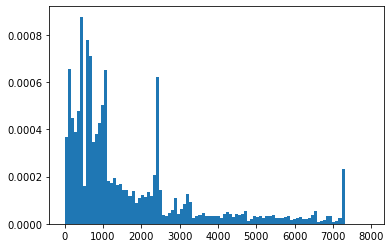

In [39]:
plt.hist(x='DLoyal', data=Ana, bins=100, density=True);
print('Graph on Loyalty Data')

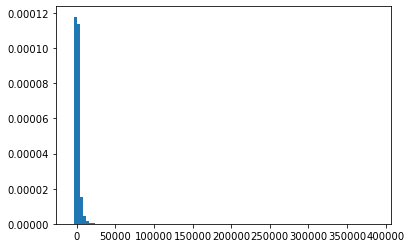

In [40]:
plt.hist(x='PointsBalance', data=Ana, bins=100, density=True);

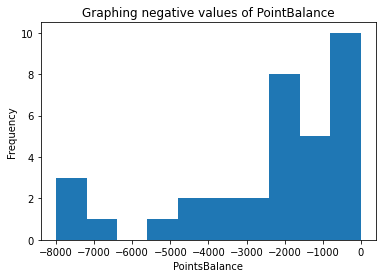

In [41]:
#Negative values for pointsbalance needs to be dropped
plt.ylabel("Frequency")
plt.xlabel("PointsBalance")
plt.title('Graphing negative values of PointBalance')
plt.hist(x='PointsBalance', data=Ana, bins=10, density=False, range=[-8000, -5]);


Text(0.5, 1.0, 'Graphing negative values of PointBalance')

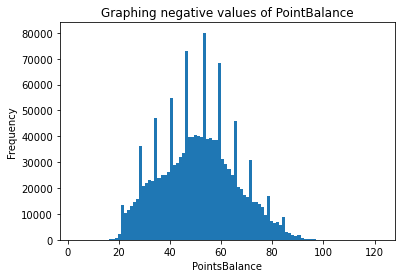

In [42]:
plt.hist(x='Age', data=Ana, bins=100, density=False);
plt.ylabel("Frequency")
plt.xlabel("PointsBalance")
plt.title('Graphing negative values of PointBalance')
#Strange distribution, but more worringly some extreme observations > 100 and < 18

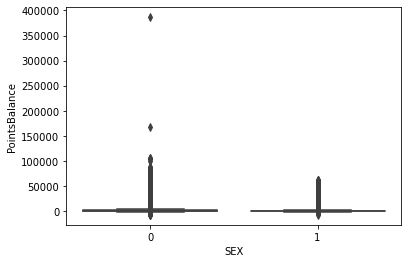

In [43]:
ax = sns.boxplot(x="SEX", y="PointsBalance", data=Ana,order=[0, 1]) # See clear outliers that render the graph completely illisible
# restrict maxobs?

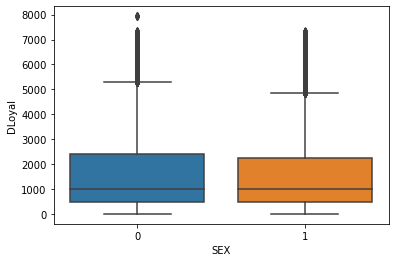

In [44]:
ax = sns.boxplot(x="SEX", y="DLoyal", data=Ana,order=[0, 1])
# Hard to tell but there doesn seem to be any significant differences between males and female. At best there are a few males that are 
#slighlty more "older" customers

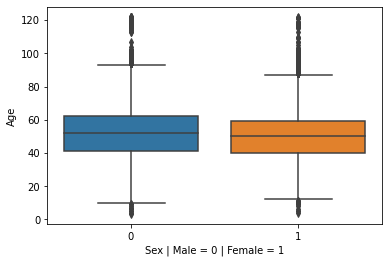

In [45]:
%matplotlib inline
ax = sns.boxplot(x="SEX", y="Age", data=Ana, order=[0, 1]).set(
    xlabel='Sex | Male = 0 | Female = 1', 
    ylabel='Age')

#We see some differences in age, although not very notable
#Note the strange outliers that are very likely to be mistakes.

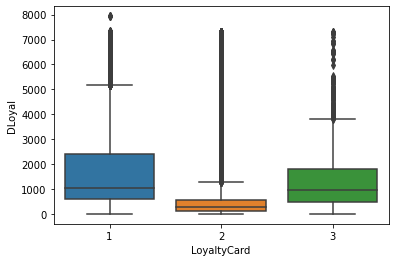

In [46]:
ax = sns.boxplot(x="LoyaltyCard", y="DLoyal", data=Ana)
# We see that a lot more new customers seem to be taking card 2, online card
#The most loyal customers are usually grouped in the regular physical card
#As we have seen before there is a very uneven distribution in card types

In [47]:
Ana['Age'].value_counts()
#ALOT of 54, 45,59,23,34,37 years old? Perhaps suspicious? NOTICE EXTREME VALUES, these must be removed!

50     40698
53     40648
51     40229
52     39763
49     39727
       ...  
7          2
105        1
104        1
110        1
3          1
Name: Age, Length: 116, dtype: int64

In [48]:
Ana['DLoyal'].value_counts()

460     3669
459     3642
461     3591
466     3454
462     3277
        ... 
4776       1
6330       1
4748       1
6968       1
4055       1
Name: DLoyal, Length: 7288, dtype: int64

<AxesSubplot:xlabel='DLoyal', ylabel='PointsBalance'>

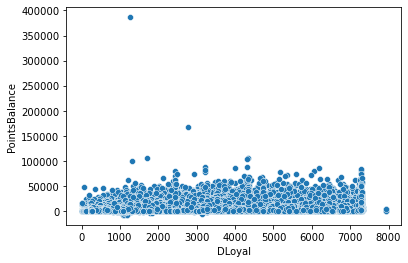

In [49]:
sns.scatterplot(x='DLoyal', y='PointsBalance',data=Ana)

<AxesSubplot:xlabel='Age', ylabel='DLoyal'>

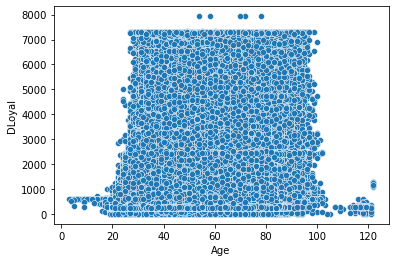

In [50]:
sns.scatterplot(x='Age', y='DLoyal',data=Ana)

In [51]:
Ana.shape

(1505315, 7)

In [52]:
### Data Cleaning Age column
Ana.drop(Ana.index[Ana['Age'] < 18], inplace=True)
Ana.drop(Ana.index[Ana['Age'] > 100], inplace=True)

In [53]:
#Data Cleaning Pointsbalance
Ana.drop(Ana.index[Ana['PointsBalance'] < 0], inplace=True)
Ana.shape

(1504819, 7)

In [54]:
Ana

,CustomerCode,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
0,7071161603018922195,0,6,1,511,2448,71
2,7071161603025867243,1,6,1,108,438,79
3,7071161603021997861,0,14,1,100,438,48
4,7071161603025554049,0,3,1,284,438,59
5,7071161603001130830,1,11,1,175,438,22
...,...,...,...,...,...,...,...
1656131,7071161603601085723,0,7,2,50,245,24
1656132,7071161603672630225,1,4,1,2741,664,60
1656133,7071161603673015798,0,6,1,8996,915,55
1656134,7071161603024035909,0,14,1,424,245,35


In [55]:
Ana['PointsBalance'].value_counts() 
#Seems normal i guess that some have 0 points others might have refueled only once e.t.c

50       50356
0        30485
100      18354
150      13165
70       11421
         ...  
18831        1
20683        1
30926        1
28879        1
26329        1
Name: PointsBalance, Length: 21654, dtype: int64

In [56]:
AnaSample = Ana.sample(n=1000)
AnaSample

,CustomerCode,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
578957,7071161603020418224,0,0,1,764,650,32
1106568,7071161603013728845,0,14,1,775,166,30
572675,7071161603670524222,0,6,1,5815,3111,65
1546080,7071161603026023002,0,14,1,742,431,44
217580,7071161603001735935,1,8,1,308,1078,55
...,...,...,...,...,...,...,...
536706,7071161603013455274,0,14,1,409,3641,64
1461934,7071161603000346866,0,11,1,130,453,51
447896,7071161603600058978,0,14,2,0,940,33
286957,7071161603010176113,0,3,1,3625,2622,59


In [57]:
FemaleAna = Ana[Ana["SEX"] == 1]
MaleAna = Ana[Ana["SEX"] == 0]
FemaleAna

,CustomerCode,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
2,7071161603025867243,1,6,1,108,438,79
5,7071161603001130830,1,11,1,175,438,22
14,7071161603021577788,1,6,1,666,438,41
17,7071161603012957072,1,14,1,871,417,44
18,7071161603006671796,1,12,1,305,417,36
...,...,...,...,...,...,...,...
1656124,7071161603601004765,1,1,2,50,278,64
1656128,7071161603021796800,1,6,1,4665,603,29
1656130,7071161603024178873,1,15,1,80,279,46
1656132,7071161603672630225,1,4,1,2741,664,60


In [58]:
MaleAna

,CustomerCode,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
0,7071161603018922195,0,6,1,511,2448,71
3,7071161603021997861,0,14,1,100,438,48
4,7071161603025554049,0,3,1,284,438,59
6,7071161603600727184,0,3,2,0,438,53
7,7071161603009341561,0,6,1,543,438,67
...,...,...,...,...,...,...,...
1656127,7071161603672677507,0,6,1,630,1089,31
1656129,7071161603601004278,0,6,2,630,279,42
1656131,7071161603601085723,0,7,2,50,245,24
1656133,7071161603673015798,0,6,1,8996,915,55


In [59]:
FemaleAna.describe()

,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
count,494747.0,494747.000000,494747.000000,494747.000000,494747.000000,494747.000000
mean,1.0,9.216551,1.061541,1184.208220,1577.595037,50.069163
std,0.0,4.864357,0.243569,2023.560418,1623.454426,14.093495
min,1.0,0.000000,1.000000,0.000000,1.000000,18.000000
25%,1.0,6.000000,1.000000,150.000000,479.000000,40.000000
50%,1.0,8.000000,1.000000,471.000000,984.000000,50.000000
75%,1.0,14.000000,1.000000,1391.000000,2234.000000,59.000000
max,1.0,19.000000,3.000000,62351.000000,7323.000000,100.000000


In [60]:
MaleAna.describe()
#see slight differences in means in some of the categories
#Men are around 50.6 years old, Femalse are 49.
#Men are more likely to hold a higher amount of points and to have more loyal days

,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
count,1010072.0,1.010072e+06,1.010072e+06,1.010072e+06,1.010072e+06,1.010072e+06
mean,0.0,8.914593e+00,1.097314e+00,1.733093e+03,1.707958e+03,5.166734e+01
std,0.0,4.969252e+00,3.179816e-01,3.019056e+03,1.773211e+03,1.509454e+01
min,0.0,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01
25%,0.0,4.000000e+00,1.000000e+00,1.690000e+02,4.700000e+02,4.100000e+01
50%,0.0,8.000000e+00,1.000000e+00,6.410000e+02,1.014000e+03,5.200000e+01
75%,0.0,1.400000e+01,1.000000e+00,2.039000e+03,2.402000e+03,6.200000e+01
max,0.0,1.900000e+01,3.000000e+00,3.865440e+05,7.934000e+03,1.000000e+02


In [61]:
Ana

,CustomerCode,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
0,7071161603018922195,0,6,1,511,2448,71
2,7071161603025867243,1,6,1,108,438,79
3,7071161603021997861,0,14,1,100,438,48
4,7071161603025554049,0,3,1,284,438,59
5,7071161603001130830,1,11,1,175,438,22
...,...,...,...,...,...,...,...
1656131,7071161603601085723,0,7,2,50,245,24
1656132,7071161603672630225,1,4,1,2741,664,60
1656133,7071161603673015798,0,6,1,8996,915,55
1656134,7071161603024035909,0,14,1,424,245,35


In [62]:
Ana.describe()
#Much better!

,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age
count,1.504819e+06,1.504819e+06,1.504819e+06,1.504819e+06,1.504819e+06,1.504819e+06
mean,3.287751e-01,9.013869e+00,1.085552e+00,1.552634e+03,1.665098e+03,5.114190e+01
std,4.697682e-01,4.937048e+00,2.960682e-01,2.744223e+03,1.726495e+03,1.479197e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01
25%,0.000000e+00,4.000000e+00,1.000000e+00,1.590000e+02,4.730000e+02,4.000000e+01
50%,0.000000e+00,8.000000e+00,1.000000e+00,5.750000e+02,1.007000e+03,5.100000e+01
75%,1.000000e+00,1.400000e+01,1.000000e+00,1.800000e+03,2.377000e+03,6.100000e+01
max,1.000000e+00,1.900000e+01,3.000000e+00,3.865440e+05,7.934000e+03,1.000000e+02


# III. Data Cleaning ReFuelling Dataset

In [63]:
Refuel.describe()

,CustomerCode,Litres,GasLoyaltyPoints
count,1.178786e+07,1.178786e+07,1.178786e+07
mean,7.071162e+18,4.055607e+01,3.723561e+01
std,1.098075e+09,4.562399e+01,2.589148e+01
min,7.071162e+18,1.000000e+00,-1.800000e+02
25%,7.071162e+18,2.000000e+01,1.800000e+01
50%,7.071162e+18,3.300000e+01,3.100000e+01
75%,7.071162e+18,5.000000e+01,5.000000e+01
max,7.071162e+18,1.200000e+03,2.400000e+02


In [64]:
Refuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787862 entries, 0 to 11787861
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CustomerCode      int64         
 1   GasStatCode       object        
 2   TransactionDate   datetime64[ns]
 3   Product           object        
 4   SalesModality     object        
 5   Litres            int64         
 6   GasLoyaltyPoints  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 629.5+ MB


In [65]:
Refuel.isnull().mean()
# No missing values

CustomerCode        0.0
GasStatCode         0.0
TransactionDate     0.0
Product             0.0
SalesModality       0.0
Litres              0.0
GasLoyaltyPoints    0.0
dtype: float64

In [66]:
Refuel['CustomerCode']=Refuel['CustomerCode'].apply(str)

In [67]:
Refuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787862 entries, 0 to 11787861
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CustomerCode      object        
 1   GasStatCode       object        
 2   TransactionDate   datetime64[ns]
 3   Product           object        
 4   SalesModality     object        
 5   Litres            int64         
 6   GasLoyaltyPoints  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 629.5+ MB


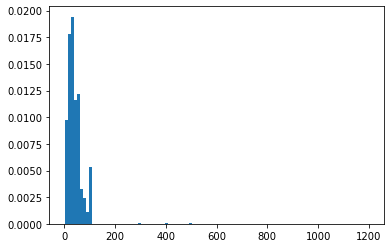

In [68]:
plt.hist(x='Litres', data=Refuel, bins=100, density=True);


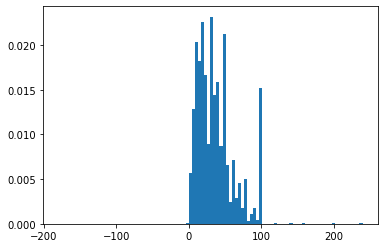

In [69]:
plt.hist(x='GasLoyaltyPoints', data=Refuel, bins=100, density=True);
# someoutlier over 100, perhaps see some negative values as well here

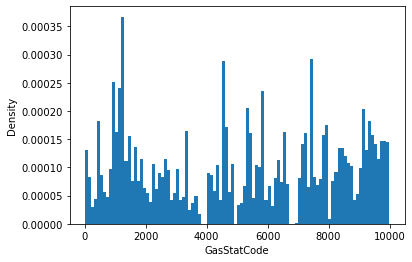

In [70]:
plt.hist(x='GasStatCode', data=Refuel, bins=100, density=True)
plt.ylabel('Density')
plt.xlabel('GasStatCode');
#plt.hist(x='GasStatCode', data=Refuel, bins=100, density=True, range=[-10,10]);
#See some very popular gas station, hard to make sense of the values here

In [71]:
Refuel['GasStatCode'].value_counts()
#See clearly some super popular gas stations and oter more remote ones

7132    76192
4522    61540
68      58743
138     51564
4506    49053
        ...  
6328        4
5173        4
9797        2
8555        2
9426        1
Name: GasStatCode, Length: 2562, dtype: int64

In [72]:
Refuel['GasStatCode'].describe()

count     11787862
unique        2562
top           7132
freq         76192
Name: GasStatCode, dtype: int64

In [73]:
Refuel['GasLoyaltyPoints'].describe()
#Negative Gas loyalty points do not make sense, so we will remove these

count    1.178786e+07
mean     3.723561e+01
std      2.589148e+01
min     -1.800000e+02
25%      1.800000e+01
50%      3.100000e+01
75%      5.000000e+01
max      2.400000e+02
Name: GasLoyaltyPoints, dtype: float64

In [74]:
Refuel.shape

(11787862, 7)

In [75]:
Refuel.drop(Refuel.index[Refuel['GasLoyaltyPoints'] < 0], inplace=True)

In [76]:
Refuel.shape

(11780999, 7)

In [77]:
Refuel['SalesModality'].value_counts()

SELF       6163693
SERVITO    4703957
EASY        546173
OPT         348523
OPT POS      18653
Name: SalesModality, dtype: int64

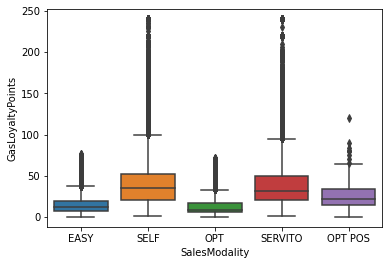

In [78]:
import seaborn as sns
ax = sns.boxplot(x="SalesModality", y="GasLoyaltyPoints", data=Refuel)
#See clear differences between the Salesmodalities but hard to say if any significant differences, remember skewed distribution above

In [79]:
Refuel['GasLoyaltyPoints'].describe()


count    1.178100e+07
mean     3.727594e+01
std      2.583952e+01
min      0.000000e+00
25%      1.800000e+01
50%      3.100000e+01
75%      5.000000e+01
max      2.400000e+02
Name: GasLoyaltyPoints, dtype: float64

In [80]:
Refuel["SalesModality"] = Refuel["SalesModality"].map({"EASY":1,"SELF":2,"OPT":3,"SERVITO":4,"OPT POS":5})

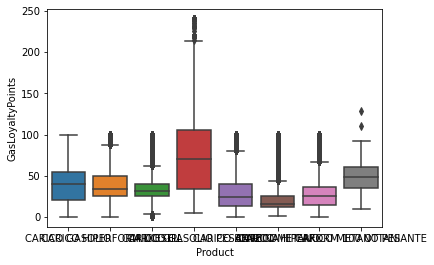

In [81]:
import seaborn as sns
ax = sns.boxplot(x="Product", y="GasLoyaltyPoints", data=Refuel)
#See clear differences between the different gasprices.

In [82]:
Refuel["Product"].value_counts()
# Clearly 2 preferred products, are there differences in loyalty rewards/points between these? YES!

CARICO GASOLIO                 5835363
CARICO BENZINA                 4403314
CARICO GPL                      641881
CARICO HIPERFORM DIESEL         551675
CARICO HIPERFORM 100 OTTANI     228215
CARICO GASOLIO PESANTE           77482
CARICO METANO                    42962
CARICO METANO PESANTE              107
Name: Product, dtype: int64

In [83]:
#Refuel["Product"] = Refuel["Product"].map({"CARICO GASOLIO":1,"CARICO BENZINA":2,"CARICO GPL":3,"CARICO HIPERFORM DIESEL":4,"OPT CARICO HIPERFORM 100 OTTANI":5,"CARICO GASOLIO PESANTE":6,"CARICO METANO":7,"CARICO METANO PESANTE":8})
#Find a way to map these in a better way perhaps?
#Can maybe reduce into Gasiol, benzina, high-value, methane

In [84]:
# CAn see that sometimes the each 2litres gives 1 gasloyalty points and other times only 1 litre needed.
# This is due to the sales modality! 
import math
Refuel['RatioLoyalty']=(Refuel['Litres']/Refuel['GasLoyaltyPoints'])
Refuel['RatioLoyalty']=Refuel['RatioLoyalty'].apply(np.floor)
Refuel

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,1,7,3,2.0
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,2,17,17,1.0
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,3,39,19,2.0
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,4,54,54,1.0
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,4,31,31,1.0
...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0


#### Now the goal will be to get good measures of customer loyalty and perhaps even churn

In [85]:
# use groupby to group CustomerCode together

In [86]:
a=min(Refuel['TransactionDate'])
a
#minimum Date is the first of march 2021 (not 2020?)

Timestamp('2021-03-01 00:00:57')

In [87]:
b=max(Refuel['TransactionDate'])
b
#Last Date is the 31st of August.

Timestamp('2021-08-31 23:59:18')

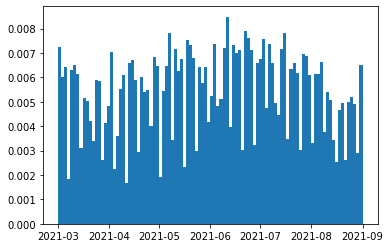

In [88]:
plt.hist(x='TransactionDate', data=Refuel, bins=100, density=True);
#Looks good, data for around 6 months.

In [89]:
Refuel['TotalTransactions']=Refuel['TransactionDate'].groupby(Refuel['CustomerCode']).transform('count')

In [90]:
Refuel.sort_values(by=['TotalTransactions'])
# Top customer should be the one with 265 Total Transactions.

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions
6420137,7071161603601556046,9022,2021-06-10 21:15:08,CARICO BENZINA,3,10,5,2.0,1
5621591,7071161603004985594,2247,2021-05-31 08:30:01,CARICO GASOLIO,4,30,30,1.0,1
86940,7071161603007297484,4522,2021-03-02 07:46:53,CARICO GASOLIO,2,98,98,1.0,1
11192106,7071161603601813322,5341,2021-08-20 18:07:10,CARICO BENZINA,4,3,3,1.0,1
7681247,7071161603003733193,1447,2021-06-28 11:10:41,CARICO BENZINA,4,70,70,1.0,1
...,...,...,...,...,...,...,...,...,...
5421324,7071161603001989086,956,2021-05-27 14:50:05,CARICO BENZINA,2,4,4,1.0,265
1812525,7071161603001989086,956,2021-03-31 15:09:10,CARICO BENZINA,2,5,5,1.0,265
1695325,7071161603001989086,956,2021-03-29 16:58:35,CARICO BENZINA,2,5,5,1.0,265
1174850,7071161603001989086,956,2021-03-19 11:03:39,CARICO BENZINA,2,6,6,1.0,265


In [91]:
Refuel['AverageRefueled']=Refuel['Litres'].groupby(Refuel['CustomerCode']).transform('mean')

In [92]:
Refuel['TotalRefueled']=Refuel['Litres'].groupby(Refuel['CustomerCode']).transform('sum')

In [93]:
Refuel

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,1,7,3,2.0,19,14.105263,268
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,2,17,17,1.0,28,21.321429,597
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,3,39,19,2.0,20,37.400000,748
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,4,54,54,1.0,16,44.812500,717
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,4,31,31,1.0,23,38.652174,889
...,...,...,...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50


In [94]:
Refuel['TotalTransactions'].describe()
#min = 1, Max 2650

count    1.178100e+07
mean     2.487471e+01
std      1.901066e+01
min      1.000000e+00
25%      1.200000e+01
50%      2.100000e+01
75%      3.300000e+01
max      2.650000e+02
Name: TotalTransactions, dtype: float64

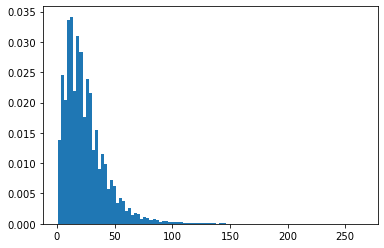

In [95]:
plt.hist(x='TotalTransactions', data=Refuel, bins=100, density=True);
#We can see the distribution here!

In [96]:
Refuel['Month'] = Refuel['TransactionDate'].dt.month
Refuel['Day'] = Refuel['TransactionDate'].dt.day
Refuel
# So customers with month = 8 are customers that are still active

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,1,7,3,2.0,19,14.105263,268,3,1
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,2,17,17,1.0,28,21.321429,597,3,1
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,3,39,19,2.0,20,37.400000,748,3,1
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,4,54,54,1.0,16,44.812500,717,3,1
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,4,31,31,1.0,23,38.652174,889,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925,8,31
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311,8,31
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89,8,31
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50,8,31


In [97]:
#Another measure of loyal customeres might be the average time between transactions
Refuel['previous_tr'] = Refuel.groupby(['CustomerCode', 'Month'])['TransactionDate'].shift()
#From this, days between visits is simply the difference:


In [98]:
Refuel

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,previous_tr
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,1,7,3,2.0,19,14.105263,268,3,1,NaT
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,2,17,17,1.0,28,21.321429,597,3,1,NaT
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,3,39,19,2.0,20,37.400000,748,3,1,NaT
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,4,54,54,1.0,16,44.812500,717,3,1,NaT
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,4,31,31,1.0,23,38.652174,889,3,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925,8,31,2021-08-30 19:53:06
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311,8,31,2021-08-21 10:12:01
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89,8,31,2021-08-23 16:04:53
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50,8,31,NaT


In [99]:

Refuel['days_bw_tr'] = Refuel['TransactionDate'] - Refuel['previous_tr']

In [100]:
#Average days between visits:
Refuel

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,previous_tr,days_bw_tr
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,1,7,3,2.0,19,14.105263,268,3,1,NaT,NaT
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,2,17,17,1.0,28,21.321429,597,3,1,NaT,NaT
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,3,39,19,2.0,20,37.400000,748,3,1,NaT,NaT
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,4,54,54,1.0,16,44.812500,717,3,1,NaT,NaT
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,4,31,31,1.0,23,38.652174,889,3,1,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925,8,31,2021-08-30 19:53:06,1 days 04:05:16
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311,8,31,2021-08-21 10:12:01,10 days 13:46:25
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89,8,31,2021-08-23 16:04:53,8 days 07:54:03
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50,8,31,NaT,NaT


In [101]:
Refuel['days_bw_tr']=Refuel['days_bw_tr'].dt.days


In [102]:
#Calculate Avg Days Between Transaction Bw 
Refuel['AvgBwTr']=Refuel['days_bw_tr'].groupby(Refuel['CustomerCode']).transform('mean')

Refuel.tail()

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,previous_tr,days_bw_tr,AvgBwTr
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925,8,31,2021-08-30 19:53:06,1.0,2.457143
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311,8,31,2021-08-21 10:12:01,10.0,2.166667
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89,8,31,2021-08-23 16:04:53,8.0,6.500000
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50,8,31,NaT,NaN,NaN
11787861,7071161603008369308,5493,2021-08-31 23:59:18,CARICO GASOLIO,2,40,40,1.0,32,38.593750,1235,8,31,2021-08-26 14:51:29,5.0,3.923077


In [103]:
Refuel = Refuel.drop(columns=['previous_tr','days_bw_tr'])
Refuel = Refuel.rename(columns={'AvgBwTr':'AvgDaysBetwTr'})
Refuel.tail()

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,AvgDaysBetwTr
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925,8,31,2.457143
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311,8,31,2.166667
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89,8,31,6.500000
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50,8,31,NaN
11787861,7071161603008369308,5493,2021-08-31 23:59:18,CARICO GASOLIO,2,40,40,1.0,32,38.593750,1235,8,31,3.923077


In [104]:
Refuel['AvgDaysBetwTr'] = Refuel['AvgDaysBetwTr'].fillna(0)
#does it make sense to replace NA values with 0? Aka those that have only 1 transactions?
Refuel['AvgDaysBetwTr'].describe()

count    1.178100e+07
mean     6.054191e+00
std      3.971906e+00
min      0.000000e+00
25%      3.380952e+00
50%      5.291667e+00
75%      7.846154e+00
max      3.000000e+01
Name: AvgDaysBetwTr, dtype: float64

In [105]:
Refuel['AvgDaysBetwTr'].value_counts()

0.000000     420446
7.000000     137234
6.000000     137226
8.000000     124771
5.000000     122849
              ...  
23.250000        10
20.800000        10
24.250000         9
0.142857          8
26.666667         7
Name: AvgDaysBetwTr, Length: 5808, dtype: int64

In [106]:
ActiveCustomers=Refuel[Refuel["Month"] == 8]
ActiveCustomers

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,AvgDaysBetwTr
10078592,7071161603015077704,9734,2021-08-01 00:00:42,CARICO GASOLIO,3,40,20,2.0,18,34.944444,629,8,1,8.500000
10078593,7071161603007077415,4393,2021-08-01 00:00:56,CARICO BENZINA,4,61,61,1.0,63,46.079365,2903,8,1,2.087719
10078594,7071161603023935679,9705,2021-08-01 00:01:12,CARICO GASOLIO,3,11,5,2.0,28,68.250000,1911,8,1,2.681818
10078595,7071161603601166895,2457,2021-08-01 00:01:28,CARICO BENZINA,1,16,8,2.0,27,23.592593,637,8,1,5.619048
10078596,7071161603007712292,4615,2021-08-01 00:01:29,CARICO GASOLIO,1,45,22,2.0,12,35.000000,420,8,1,6.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,2,50,50,1.0,41,71.341463,2925,8,31,2.457143
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,1,12,6,2.0,27,11.518519,311,8,31,2.166667
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,3,9,4,2.0,3,29.666667,89,8,31,6.500000
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,4,50,50,1.0,1,50.000000,50,8,31,0.000000


In [107]:
ActiveCustomers['CustomerCode'].value_counts()
# Length = 603354 Active customers. Some still have multiple refuels, others less so. 

7071161603021890256    48
7071161603601202773    42
7071161603601621113    40
7071161603012371415    38
7071161603671430197    35
                       ..
7071161603004866547     1
7071161603011091832     1
7071161603000519082     1
7071161603001474204     1
7071161603002399236     1
Name: CustomerCode, Length: 603354, dtype: int64

In [108]:
ActiveCustomers.describe()

,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,AvgDaysBetwTr
count,1.708379e+06,1.708379e+06,1.708379e+06,1708379.0,1.708379e+06,1.708379e+06,1.708379e+06,1708379.0,1.708379e+06,1.708379e+06
mean,2.760201e+00,4.117519e+01,3.777032e+01,inf,2.428769e+01,4.002508e+01,9.471955e+02,8.0,1.555092e+01,6.057474e+00
std,1.041055e+00,4.381998e+01,2.620927e+01,NaN,1.889957e+01,3.860889e+01,1.288169e+03,0.0,9.227000e+00,3.998486e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,8.0,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+01,1.800000e+01,1.0,1.100000e+01,2.285714e+01,3.160000e+02,8.0,7.000000e+00,3.351351e+00
50%,2.000000e+00,3.400000e+01,3.100000e+01,1.0,2.000000e+01,3.462712e+01,6.240000e+02,8.0,1.500000e+01,5.285714e+00
75%,4.000000e+00,5.000000e+01,5.000000e+01,1.0,3.200000e+01,4.875000e+01,1.261000e+03,8.0,2.400000e+01,7.875000e+00
max,5.000000e+00,1.200000e+03,2.400000e+02,inf,2.650000e+02,1.200000e+03,3.564900e+04,8.0,3.100000e+01,3.000000e+01


In [109]:
Refuel.describe()

,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,AvgDaysBetwTr
count,1.178100e+07,1.178100e+07,1.178100e+07,11780999.0,1.178100e+07,1.178100e+07,1.178100e+07,1.178100e+07,1.178100e+07,1.178100e+07
mean,2.786540e+00,4.055890e+01,3.727594e+01,inf,2.487471e+01,4.055890e+01,9.872330e+02,5.528252e+00,1.572480e+01,6.054191e+00
std,1.033771e+00,4.563000e+01,2.583952e+01,NaN,1.901066e+01,4.072007e+01,1.350271e+03,1.652832e+00,8.868193e+00,3.971906e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+01,1.800000e+01,1.0,1.200000e+01,2.289474e+01,3.300000e+02,4.000000e+00,8.000000e+00,3.380952e+00
50%,2.000000e+00,3.300000e+01,3.100000e+01,1.0,2.100000e+01,3.500000e+01,6.640000e+02,6.000000e+00,1.600000e+01,5.291667e+00
75%,4.000000e+00,5.000000e+01,5.000000e+01,1.0,3.300000e+01,4.920000e+01,1.337000e+03,7.000000e+00,2.300000e+01,7.846154e+00
max,5.000000e+00,1.200000e+03,2.400000e+02,inf,2.650000e+02,1.200000e+03,3.564900e+04,8.000000e+00,3.100000e+01,3.000000e+01


In [110]:
# We choose to define churned customers as those that have not refueled in 3 months, 1 may be too little due 
# to vacations or other confounding factors

In [111]:
# rather interestingly the total average amount of transaction is larger in the total database than in the recent customers base


In [112]:
ChurnedCustomers=Refuel[Refuel["Month"] < 6]
ChurnedCustomers

,CustomerCode,GasStatCode,TransactionDate,Product,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,AvgDaysBetwTr
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,1,7,3,2.0,19,14.105263,268,3,1,9.153846
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,2,17,17,1.0,28,21.321429,597,3,1,0.961538
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,3,39,19,2.0,20,37.400000,748,3,1,6.928571
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,4,54,54,1.0,16,44.812500,717,3,1,9.300000
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,4,31,31,1.0,23,38.652174,889,3,1,5.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687801,7071161603010635316,7357,2021-05-31 23:51:00,CARICO GASOLIO,1,3,1,3.0,121,6.446281,780,5,31,0.947826
5687802,7071161603006563654,1431,2021-05-31 23:52:47,CARICO GASOLIO,1,27,13,2.0,53,41.792453,2215,5,31,2.212766
5687803,7071161603000134791,35,2021-05-31 23:53:55,CARICO GASOLIO,1,43,21,2.0,46,50.500000,2323,5,31,2.800000
5687804,7071161603009397654,6047,2021-05-31 23:56:57,CARICO GASOLIO,3,14,7,2.0,31,21.580645,669,5,31,4.760000


In [113]:
ChurnedCustomers.describe()

,SalesModality,Litres,GasLoyaltyPoints,RatioLoyalty,TotalTransactions,AverageRefueled,TotalRefueled,Month,Day,AvgDaysBetwTr
count,5.683936e+06,5.683936e+06,5.683936e+06,5683936.0,5.683936e+06,5.683936e+06,5.683936e+06,5.683936e+06,5.683936e+06,5.683936e+06
mean,2.807296e+00,4.086090e+01,3.762873e+01,inf,2.528821e+01,4.114843e+01,1.017116e+03,4.036329e+00,1.587353e+01,6.041284e+00
std,1.028817e+00,4.678484e+01,2.560905e+01,NaN,1.924251e+01,4.212257e+01,1.392801e+03,8.249348e-01,8.804151e+00,3.993707e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+01,2.000000e+01,1.0,1.200000e+01,2.305000e+01,3.370000e+02,3.000000e+00,8.000000e+00,3.350000e+00
50%,2.000000e+00,3.300000e+01,3.100000e+01,1.0,2.100000e+01,3.543333e+01,6.890000e+02,4.000000e+00,1.600000e+01,5.272727e+00
75%,4.000000e+00,5.000000e+01,5.000000e+01,1.0,3.300000e+01,4.985185e+01,1.392000e+03,5.000000e+00,2.400000e+01,7.846154e+00
max,5.000000e+00,1.200000e+03,2.400000e+02,inf,2.650000e+02,1.200000e+03,3.564900e+04,5.000000e+00,3.100000e+01,3.000000e+01


In [114]:
# Might be more interesting to merge these different dataset with anagrafica

### IV. Data Cleaning and EDA Prizes Dataset

In [115]:
# Now we work on the Prize dataset, intersting variables here might be frequency of purchase, 
#total amount, and what mixture of points and contributions used
#High-value customers may be thos with the highest total client contribution.

In [116]:
Prize

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution
0,7071161603670014604,2020-09-01 00:16:21,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
1,7071161603670014604,2020-09-01 00:17:30,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
2,7071161603670014604,2020-09-01 00:18:49,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
3,7071161603670014604,2020-09-01 00:19:42,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000"
...,...,...,...,...,...,...,...,...
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,"0,000000"
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,"30,000000"
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,"15,000000"
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,"0,000000"


In [117]:
Prize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501449 entries, 0 to 501448
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CustomerCode        501449 non-null  int64 
 1   RequestDate         501449 non-null  object
 2   RequestPlace        501449 non-null  object
 3   Category            501449 non-null  object
 4   MaterialGrouping    501449 non-null  object
 5   PrizeDescript       501449 non-null  object
 6   PointsRequired      501220 non-null  object
 7   ClientContribution  463554 non-null  object
dtypes: int64(1), object(7)
memory usage: 30.6+ MB


In [118]:
Prize.isnull().mean()# very few missing value percentage, so just drop them
#7% missing data on client contribution, .004% on points required
#%%
Prize = Prize.dropna()

In [119]:
Prize.shape

(463554, 8)

In [120]:
Prize['CustomerCode'].value_counts()
#One customer purchased 75 prizes, customers who purchased nothing not included

7071161603672966256    75
7071161603670636604    50
7071161603021939236    48
7071161603010399145    45
7071161603023405434    43
                       ..
7071161603008667974     1
7071161603007551179     1
7071161603020910469     1
7071161603005506746     1
7071161603020345351     1
Name: CustomerCode, Length: 216407, dtype: int64

In [121]:
Prize.info()
# notice all dtypes are object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463554 entries, 4 to 501448
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CustomerCode        463554 non-null  int64 
 1   RequestDate         463554 non-null  object
 2   RequestPlace        463554 non-null  object
 3   Category            463554 non-null  object
 4   MaterialGrouping    463554 non-null  object
 5   PrizeDescript       463554 non-null  object
 6   PointsRequired      463554 non-null  object
 7   ClientContribution  463554 non-null  object
dtypes: int64(1), object(7)
memory usage: 31.8+ MB


In [122]:
Prize['RequestDate'].value_counts()

2020-10-13 00:00:00    7
2020-10-16 00:00:00    5
2020-12-11 11:11:42    4
2021-05-20 16:27:00    3
2020-11-26 00:00:00    3
                      ..
2021-04-30 04:13:04    1
2021-07-17 08:11:47    1
2021-02-25 14:47:59    1
2020-12-24 10:55:56    1
2021-04-06 09:22:10    1
Name: RequestDate, Length: 455885, dtype: int64

In [123]:
a=min(Prize['RequestDate'])
a

'2020-09-01 00:34:24'

In [124]:
b=max(Prize['RequestDate'])
b

'2021-08-31 23:26:58'

In [125]:
Prize["RequestDate"]= pd.to_datetime(Prize["RequestDate"], format="%Y-%m-%d %H:%M:%S")
Prize["RequestDate"] = Prize["RequestDate"].astype('datetime64[ns]')
Prize["RequestDate"]

<ipython-input-125-9bbe8f3f5254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prize["RequestDate"]= pd.to_datetime(Prize["RequestDate"], format="%Y-%m-%d %H:%M:%S")
<ipython-input-125-9bbe8f3f5254>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prize["RequestDate"] = Prize["RequestDate"].astype('datetime64[ns]')


4        2020-09-01 00:34:24
5        2020-09-01 02:34:45
6        2020-09-01 03:12:54
7        2020-09-01 03:19:14
8        2020-09-01 03:20:04
                 ...        
501444   2021-08-31 23:14:00
501445   2021-08-31 23:14:59
501446   2021-08-31 23:15:02
501447   2021-08-31 23:24:29
501448   2021-08-31 23:26:58
Name: RequestDate, Length: 463554, dtype: datetime64[ns]

In [126]:
a
#minimum Date is 1st september 2020!!!

'2020-09-01 00:34:24'

In [127]:
b
#Maximum date is 31st August 2021

'2021-08-31 23:26:58'

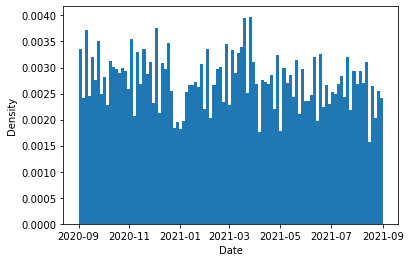

In [128]:
plt.hist(x='RequestDate', data=Prize, bins=100, density=True)
plt.ylabel('Density')
plt.xlabel('Date');

In [129]:
Prize['PointsRequired'].value_counts()
# Notice some inconsistencies in the data here, some seem to be float, others integer values

430       160070
430.0     112590
650        25146
350        13886
390        10627
           ...  
2950.0         1
5243.0         1
3990.0         1
1300           1
5185.0         1
Name: PointsRequired, Length: 291, dtype: int64

In [130]:
Prize['PointsRequired']=Prize['PointsRequired'].astype(int)


<ipython-input-130-4891bf334202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prize['PointsRequired']=Prize['PointsRequired'].astype(int)


In [131]:
Prize['PointsRequired']
# seems better now

4          450
5         1650
6          430
7          430
8          430
          ... 
501444    2395
501445    3500
501446    4200
501447    4175
501448    1750
Name: PointsRequired, Length: 463554, dtype: int64

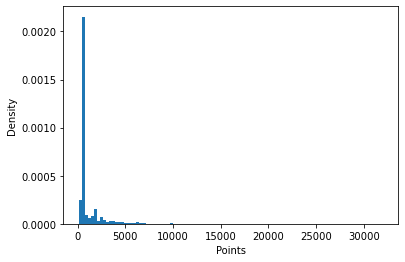

In [132]:
plt.hist(x='PointsRequired', data=Prize, bins=100, density=True)
plt.ylabel('Density')
plt.xlabel('Points');

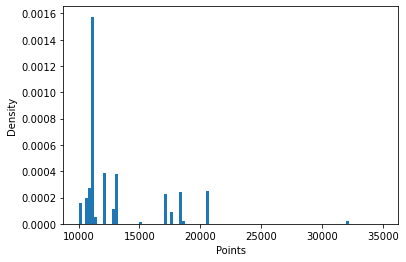

In [133]:
plt.hist(x='PointsRequired', data=Prize, bins=100, density=True, range=[10000,35000])
plt.ylabel('Density')
plt.xlabel('Points');
# now sepcify range. To see some strange outliers? or are these reasonable values?
# also when changing range to 0-10000 see one value repeated an extreme amount of times

In [134]:
a=max(Prize['PointsRequired'])
a

32000

In [135]:
Prize.head()

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000"
5,7071161603019207497,2020-09-01 02:34:45,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,"8,000000"
6,7071161603670632223,2020-09-01 03:12:54,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000"
7,7071161603670634369,2020-09-01 03:19:14,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000"
8,7071161603670706159,2020-09-01 03:20:04,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,"0,000000"


In [136]:
Prize['ClientContribution'].describe()

count       463554
unique          42
top       0,000000
freq        389550
Name: ClientContribution, dtype: object

In [137]:
Prize['ClientContribution']
# should be an integer, remove everything after comma.
# this is contribution in Euro

4          0,000000
5          8,000000
6          0,000000
7          0,000000
8          0,000000
            ...    
501444     0,000000
501445    30,000000
501446    15,000000
501447     0,000000
501448     6,000000
Name: ClientContribution, Length: 463554, dtype: object

In [138]:
Prize[['First','Last']] = Prize["ClientContribution"].str.split(",",expand=True)

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [139]:
Prize = Prize.drop(columns=['Last','ClientContribution']) # include just the value of zero, so drop it
Prize = Prize.rename(columns={'First':'ClientContribution'})

In [140]:
Prize["ClientContribution"]=Prize["ClientContribution"].astype(int)

In [141]:
Prize

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,0
5,7071161603019207497,2020-09-01 02:34:45,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,8
6,7071161603670632223,2020-09-01 03:12:54,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0
7,7071161603670634369,2020-09-01 03:19:14,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0
8,7071161603670706159,2020-09-01 03:20:04,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0
...,...,...,...,...,...,...,...,...
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,0
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,30
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,15
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,0


In [142]:
#Prize['ClientContribution'].value_counts()
# most contributions around 0 euro, unclear how important this variable will be.

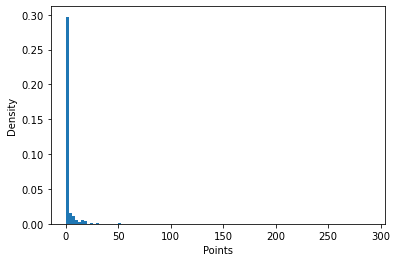

In [143]:
plt.hist(x='ClientContribution', data=Prize, bins=100, density=True)
plt.ylabel('Density')
plt.xlabel('Points');
#Again there are some contributions that are notable outliers, but most are around 0.

In [144]:
Prize['Category'].value_counts()
# 2 different categories, either premio fisico or Buono sconto carburante
# Physical prize or discount voucher for fuel i think?

BUONO SCONTO CARBURANTE    272660
PREMIO FISICO              190894
Name: Category, dtype: int64

In [145]:
Prize['RequestPlace'].value_counts()
# Very few request prize online, most go to ?point of sale?

PUNTO VENDITA    462144
ONLINE             1410
Name: RequestPlace, dtype: int64

In [146]:
Prize['MaterialGrouping'].value_counts()
# Descirbes the group each prize belongs to

BUONO SCONTO CARBURANTE    272660
PER LA TUA CASA             64020
ELETTRONICA                 24379
ELETTRODOMESTICI            16696
CASA                        15755
TAVOLA & CUCINA             14964
PER IL TUO BENESSERE        14858
TEMPO LIBERO                 8249
PER TE                       8015
MODA                         7237
SPORT                        3438
PER IL TUO BAMBINO           2837
PER IL TUO AMBIENTE          2813
PER IL TUO VIAGGIO           2171
BAMBINI                      1749
AMICI A 4 ZAMPE              1554
GUARDA & PRENOTA             1366
BELLEZZA & BENESSERE          698
PER IL  TUO CUCCIOLO           60
ONLUS & PROGETTI               35
Name: MaterialGrouping, dtype: int64

In [147]:
Prize['PrizeDescript'].value_counts()
#341 different prizes. Mots popular is Buono Sconto Carb 4E 430 Punti :) 

BUONO SCONTO CARB 4E 430 PUNTI                88550
BUONO SCONTO CARB 4E 860 PUNTI                70302
BUONO SCONTO CARB 4E 1290 PUNTI               66117
BUONO SCONTO CARB 4E 2580 PUNTI               47553
CONSEGNA PASTA GAROFALO                       30722
                                              ...  
CONSEGNA CODICE AVIS DREAMCAR 1GG                 1
ANNULLO CONSEGNA TELO MARE RE-TOWEL               1
ANNULLO PRENOTAZIONE AMPLIF. WI-FII               1
ANNULLO PRENOTAZIONE IDROPULITRICE KARCHER        1
ANNULLO PRENOTAZIONE COMPL.LETTO BIMBA 1 P        1
Name: PrizeDescript, Length: 341, dtype: int64

In [148]:
Prize.tail()

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,0
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,30
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,15
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,0
501448,7071161603020806626,2021-08-31 23:26:58,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,1750,6


In [149]:
Prize['TotalPointsSpent']=Prize['PointsRequired'].groupby(Prize['CustomerCode']).transform('sum')
Prize

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution,TotalPointsSpent
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,0,450
5,7071161603019207497,2020-09-01 02:34:45,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,8,3150
6,7071161603670632223,2020-09-01 03:12:54,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,6450
7,7071161603670634369,2020-09-01 03:19:14,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,6900
8,7071161603670706159,2020-09-01 03:20:04,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,8580
...,...,...,...,...,...,...,...,...,...
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,0,6595
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,30,8576
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,15,6595
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,0,4575


In [150]:
Prize['TotalRequest']=Prize['RequestDate'].groupby(Prize['CustomerCode']).transform('count')
Prize

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,0,450,1
5,7071161603019207497,2020-09-01 02:34:45,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,8,3150,2
6,7071161603670632223,2020-09-01 03:12:54,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,6450,15
7,7071161603670634369,2020-09-01 03:19:14,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,6900,16
8,7071161603670706159,2020-09-01 03:20:04,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,8580,17
...,...,...,...,...,...,...,...,...,...,...
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,0,6595,2
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,30,8576,3
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,15,6595,2
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,0,4575,5


In [151]:
Prize['TotalContribution']=Prize['ClientContribution'].groupby(Prize['CustomerCode']).transform('sum')


In [152]:
Prize['Month'] = Prize['RequestDate'].dt.month
Prize['Day'] = Prize['RequestDate'].dt.day
Prize

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,Month,Day
4,7071161603014051338,2020-09-01 00:34:24,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,0,450,1,0,9,1
5,7071161603019207497,2020-09-01 02:34:45,PUNTO VENDITA,PREMIO FISICO,PER IL TUO BENESSERE,PRENOTAZIONE BILANCIA BODYMASTER ROWENTA,1650,8,3150,2,13,9,1
6,7071161603670632223,2020-09-01 03:12:54,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,6450,15,0,9,1
7,7071161603670634369,2020-09-01 03:19:14,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,6900,16,0,9,1
8,7071161603670706159,2020-09-01 03:20:04,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430,0,8580,17,8,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,0,6595,2,15,8,31
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,30,8576,3,30,8,31
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,15,6595,2,15,8,31
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,0,4575,5,0,8,31


In [153]:
Prize['previous_tr'] = Prize.groupby(['CustomerCode', 'Month'])['RequestDate'].shift()
Prize['days_bw_tr'] = Prize['RequestDate'] - Prize['previous_tr']
Prize['days_bw_tr']=Prize['days_bw_tr'].dt.days
Prize['AvgBwTr']=Prize['days_bw_tr'].groupby(Prize['CustomerCode']).transform('mean')
Prize = Prize.drop(columns=['previous_tr','days_bw_tr'])
Prize = Prize.rename(columns={'AvgBwTr':'AvgDaysBetwReq'})
Prize.tail()

,CustomerCode,RequestDate,RequestPlace,Category,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,Month,Day,AvgDaysBetwReq
501444,7071161603014068530,2021-08-31 23:14:00,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395,0,6595,2,15,8,31,0.0
501445,7071161603670271808,2021-08-31 23:14:59,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500,30,8576,3,30,8,31,1.0
501446,7071161603014068530,2021-08-31 23:15:02,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200,15,6595,2,15,8,31,0.0
501447,7071161603007816325,2021-08-31 23:24:29,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175,0,4575,5,0,8,31,0.0
501448,7071161603020806626,2021-08-31 23:26:58,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,1750,6,1750,1,6,8,31,NaN


In [154]:
Prize['AvgDaysBetwReq'].value_counts()

0.000000     169992
1.000000       3696
2.000000       3299
3.000000       3282
6.000000       3178
              ...  
1.555556         11
28.500000        11
1.125000         10
1.444444         10
23.666667         9
Name: AvgDaysBetwReq, Length: 513, dtype: int64

# End Of First Part of Script

In [155]:
### NOW MUST MERGE ALL DATASETS. THEN DO SOME FEATURES ENGINEERING

In [156]:
#%% Importing Packages
print('Shortcut Start of Script')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

Shortcut Start of Script


# Table of Contents Shortcut FILE
###### I. File imports (Skipped)
###### II. Data cleaning & Exploratory Data Analysis Anagrafica (Skipped)
###### III. Data cleaning & Exploratory Data Analysis Refuelling Dataset (Skipped)
###### IV. Data cleaning & EDA Prize Dataset (Skipped)
#### V. Merging (START OF SCRIPT)
#### VI. RFM Analysis
#### VII. Logistic Regression

# V. Merging Datasets

In [157]:
#Here We must Merge all 3 datasets into one Large Database

In [159]:
#%%
# Import Rifornimenti File data on Refueling, change drive location!
# Also import Anagrafica and Prize dataset

#specify Path where file is located"
data_file =""
#"
file1 = data_file + "Ana.csv"
file2 = data_file + "Refuel.csv"
file3 = data_file + "Prize.csv"

#Remove hashtag below to import merged file (Anagrafica and Refuel for now)!

Ana = pd.read_csv(file1, delimiter=(","))
Refuel = pd.read_csv(file2, delimiter=(","))
Prize = pd.read_csv(file3, delimiter=(","))

#Data Cleaning
print(Ana.head())

          CustomerCode  SEX   REGIONE PROVINCIA   COMUNE  LoyaltyCard  \
0  7071161603018922195    0     LAZIO   VITERBO    SUTRI            1   
1  7071161603025867243    1     LAZIO      ROMA     ROMA            1   
2  7071161603021997861    0   SICILIA   MESSINA  MESSINA            1   
3  7071161603025554049    0  CAMPANIA   SALERNO    EBOLI            1   
4  7071161603001130830    1  PIEMONTE    TORINO   TORINO            1   

   PointsBalance  DLoyal  Age  
0            511    2448   71  
1            108     437   79  
2            100     437   48  
3            284     437   59  
4            175     437   22  


### Found some geographical data on some GAS stations

#### This above only includes a handfull of stations, and im not sure its the right code, so i wont continue working on it

In [160]:
# I think it makes the most sense to always have customer characteristics, nonsense to have missing data in that dataset
Merged = Ana.merge(Refuel, how='inner', on='CustomerCode')

In [161]:
Merged.shape # 10,7 Million obs

(10730144, 22)

# Main Exploratory Data Analysis, Full Dataset, Fully Cleaned

## Now attempt to merge prize Dataset aswell

In [162]:
#Make sure all Customer Code IDs are of same type across datasets
Prize['CustomerCode']=Prize['CustomerCode'].apply(str)
Merged['CustomerCode']=Merged['CustomerCode'].apply(str)

In [163]:
#Merge all 3 datasets together
FullMerge = Merged.merge(Prize, how='inner', on='CustomerCode')

# Make alternative Dataset For RFM analysis

In [164]:
#Make a copy of the FullMerge Dataframe for RFM Data Cleaning
df=FullMerge

In [165]:
#Firstly acquire data for Recency Variable
df_recency = df.groupby(by='CustomerCode', as_index=False)['TransactionDate'].max()
df_recency.columns = ['CustomerCode', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency["LastPurchaseDate"]= pd.to_datetime(df_recency["LastPurchaseDate"], format="%Y-%m-%d %H:%M:%S")
df_recency['Recency'] = pd.to_datetime("now")-df_recency['LastPurchaseDate']
#df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
#    lambda x: (pd.to_datetime(recent_date) - x).days)


In [166]:
from datetime import datetime
df_recency['Recency'] = df_recency['Recency'].dt.total_seconds()/60/60/24
df_recency.tail()

,CustomerCode,LastPurchaseDate,Recency
181667,7071161603690007745,2021-08-30 15:09:14,138.264589
181668,7071161603690007752,2021-08-09 15:36:49,159.245434
181669,7071161603690007760,2021-08-07 17:16:59,161.175874
181670,7071161603690007786,2021-08-07 17:17:31,161.175503
181671,7071161603690007802,2021-08-09 15:35:14,159.246533


In [167]:
#Want number of Days between Last Day available in Customer Database and the Day of Customers Last transaction
#Here just set = 130 to approximate
df_recency['Recency'] = df_recency['Recency'].apply('int64')
df_recency['Recency']=df_recency['Recency']-130
df_recency.drop(columns=['LastPurchaseDate'], inplace=True)

In [168]:
#Next compute Frequency Variable by Customer
df_frequency = df.groupby(by='CustomerCode', as_index=False)['TotalTransactions'].max()
df_frequency.columns = ['CustomerCode', 'Frequency']
df_frequency.head()

,CustomerCode,Frequency
0,7071161603000001313,11
1,7071161603000001370,22
2,7071161603000001610,27
3,7071161603000001677,8
4,7071161603000004416,10


In [169]:
#Compute Monetary variable by customer
df_monetary = df.groupby(by='CustomerCode', as_index=False)['TotalRefueled'].max()
df_monetary.columns = ['CustomerCode', 'Monetary']
df_monetary.head()

,CustomerCode,Monetary
0,7071161603000001313,308
1,7071161603000001370,381
2,7071161603000001610,1259
3,7071161603000001677,357
4,7071161603000004416,169


In [170]:
#Merge all 3 datasets into one large Dataframe that will be used later on for RFM
rf_df = df_recency.merge(df_frequency, on='CustomerCode')
rfm_df = rf_df.merge(df_monetary, on='CustomerCode')
rfm_df.head()

,CustomerCode,Recency,Frequency,Monetary
0,7071161603000001313,35,11,308
1,7071161603000001370,27,22,381
2,7071161603000001610,35,27,1259
3,7071161603000001677,32,8,357
4,7071161603000004416,20,10,169


# End Of RFM Data Cleaning

# Fully Merged Dataset Data Cleaning

In [171]:
#Transform the AVeragedaysbetween columns for refuel and prize, since one time purchase should have missing values here
#If only one transaction than the average days between should not be 0, it should be null?
import numpy as np
NaN = np.nan

FullMerge['AvgDaysBetwTr'] = FullMerge['AvgDaysBetwTr'].fillna(0)
FullMerge['AvgDaysBetwReq'] = FullMerge['AvgDaysBetwReq'].fillna(0)
FullMerge['AvgDaysBetwTr'] = FullMerge['AvgDaysBetwTr'].apply(np.ceil)
FullMerge['AvgDaysBetwReq'] = FullMerge['AvgDaysBetwReq'].apply(np.ceil)
FullMerge['AvgDaysBetwTr'] = FullMerge['AvgDaysBetwTr'].apply('int64')
FullMerge['AvgDaysBetwReq'] = FullMerge['AvgDaysBetwReq'].apply('int64')
FullMerge.head()

,CustomerCode,SEX,REGIONE,PROVINCIA,COMUNE,LoyaltyCard,PointsBalance,DLoyal,Age,GasStatCode,...,MaterialGrouping,PrizeDescript,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,Month_y,Day_y,AvgDaysBetwReq
0,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,PER IL TUO BAMBINO,PRENOTAZIONE KEEP ME COMP.LETTO BIMBA,1700,5,1700,1,5,3,30,0
1,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,7418,...,PER IL TUO BAMBINO,PRENOTAZIONE KEEP ME COMP.LETTO BIMBA,1700,5,1700,1,5,3,30,0
2,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,PER IL TUO BAMBINO,PRENOTAZIONE KEEP ME COMP.LETTO BIMBA,1700,5,1700,1,5,3,30,0
3,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,PER IL TUO BAMBINO,PRENOTAZIONE KEEP ME COMP.LETTO BIMBA,1700,5,1700,1,5,3,30,0
4,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,PER IL TUO BAMBINO,PRENOTAZIONE KEEP ME COMP.LETTO BIMBA,1700,5,1700,1,5,3,30,0


In [172]:
#Generate dummy variable to capture single purchase customers, and recent purchase customers
#If refuel transaction in month 8 or 7, dummy LoyalRefuel = 1
#If Prize request in month 11 or 12,(equivalent to month 8 in other dataset)) dummy LoyalPrize = 1
#If More than 1 Refuel Transaction then FreqRefuel = 1
#If More than 1 Prize Request then LoyalPrize = 1

FullMerge.loc[FullMerge['TotalTransactions'] == 1, 'FreqRefuel'] = 0 
FullMerge.loc[FullMerge['TotalTransactions'] != 1, 'FreqRefuel'] = 1 
FullMerge.loc[FullMerge['TotalRequest'] == 1, 'FreqPrize'] = 0 
FullMerge.loc[FullMerge['TotalRequest'] != 1, 'FreqPrize'] = 1 
FullMerge.loc[FullMerge['Month_x'] < 7, 'LoyalRefuel'] = 0 
FullMerge.loc[FullMerge['Month_x'] >= 7, 'LoyalRefuel'] = 1 
FullMerge.loc[FullMerge['Month_y'] < 11, 'LoyalPrize'] = 0 
FullMerge.loc[FullMerge['Month_y'] >= 11, 'LoyalPrize'] = 1 
FullMerge.head()

,CustomerCode,SEX,REGIONE,PROVINCIA,COMUNE,LoyaltyCard,PointsBalance,DLoyal,Age,GasStatCode,...,TotalPointsSpent,TotalRequest,TotalContribution,Month_y,Day_y,AvgDaysBetwReq,FreqRefuel,FreqPrize,LoyalRefuel,LoyalPrize
0,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,1700,1,5,3,30,0,1.0,0.0,0.0,0.0
1,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,7418,...,1700,1,5,3,30,0,1.0,0.0,0.0,0.0
2,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,1700,1,5,3,30,0,1.0,0.0,0.0,0.0
3,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,1700,1,5,3,30,0,1.0,0.0,0.0,0.0
4,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,1700,1,5,3,30,0,1.0,0.0,0.0,0.0


In [173]:
#Converty dummy var into integers
FullMerge['FreqRefuel']=FullMerge['FreqRefuel'].apply(int)
FullMerge['FreqPrize']=FullMerge['FreqPrize'].apply(int)
FullMerge['LoyalRefuel']=FullMerge['LoyalRefuel'].apply(int)
FullMerge['LoyalPrize']=FullMerge['LoyalPrize'].apply(int)

In [174]:
#Drop unecessary variables 
FullMerge.drop('TransactionDate',axis=1,inplace=True) 
FullMerge.drop('RatioLoyalty',axis=1,inplace=True) 
FullMerge.drop('Month_x',axis=1,inplace=True) 
FullMerge.drop('Day_x',axis=1,inplace=True) 
FullMerge.drop('Month_y',axis=1,inplace=True) 
FullMerge.drop('Day_y',axis=1,inplace=True) 

In [175]:
# Probably only want one observation per customer, Create new dataset for info on each individual customer
CustomerBase=FullMerge.drop_duplicates(subset ="CustomerCode")
CustomerBase

,CustomerCode,SEX,REGIONE,PROVINCIA,COMUNE,LoyaltyCard,PointsBalance,DLoyal,Age,GasStatCode,...,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,AvgDaysBetwReq,FreqRefuel,FreqPrize,LoyalRefuel,LoyalPrize
0,7071161603021538806,0,PUGLIA,BARI,BARI,1,940,417,48,8339,...,1700,5,1700,1,5,0,1,0,0,0
13,7071161603024035446,0,SICILIA,PALERMO,PALERMO,1,584,240,36,9842,...,430,0,860,2,0,0,1,1,0,0
75,7071161603020728523,1,SICILIA,CATANIA,RAMACCA,1,1099,433,56,9093,...,650,0,650,1,0,0,1,0,0,1
82,7071161603003057999,0,LOMBARDIA,MILANO,MILANO,1,812,2433,51,1223,...,430,0,430,1,0,0,1,0,0,0
90,7071161603001608041,1,PIEMONTE,VERBANIA,OMEGNA,1,581,2471,54,844,...,715,0,715,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379978,7071161603003797289,1,LOMBARDIA,BERGAMO,BERGAMO,1,337,1083,48,4688,...,430,0,430,1,0,0,1,0,0,0
9380003,7071161603601088214,1,LOMBARDIA,BERGAMO,BERGAMO,2,583,244,49,3699,...,350,0,700,2,0,0,1,1,0,0
9380061,7071161603022610786,0,PIEMONTE,ASTI,ASTI,1,394,2476,82,488,...,430,0,860,2,0,0,1,1,0,0
9380087,7071161603672677507,0,LAZIO,ROMA,ROMA,1,630,1088,31,5654,...,3200,19,3200,1,19,0,1,0,0,0


In [176]:
ReducedBase=CustomerBase.drop(columns=['RequestDate','PrizeDescript','RequestPlace','GasStatCode','Product','Litres','GasLoyaltyPoints','Category','MaterialGrouping','PointsRequired','ClientContribution'])
#Here we removed all the variables that were not very connected to individual transactions and not very informative about a single customer

In [369]:
#%% We Temporarily Delete Province and commune information, focus on Regions
from sklearn.preprocessing import LabelEncoder
#%%
#%%
d_col = ['PROVINCIA','COMUNE']
ReducedBase.drop(d_col,axis=1,inplace=True) # Since there are three geographical features, left only one
#%%
#Ana.head()
#%%
col =["REGIONE"]
le = LabelEncoder()
ReducedBase[col] = ReducedBase[col].apply(le.fit_transform) # map the region into numbers
#%% md

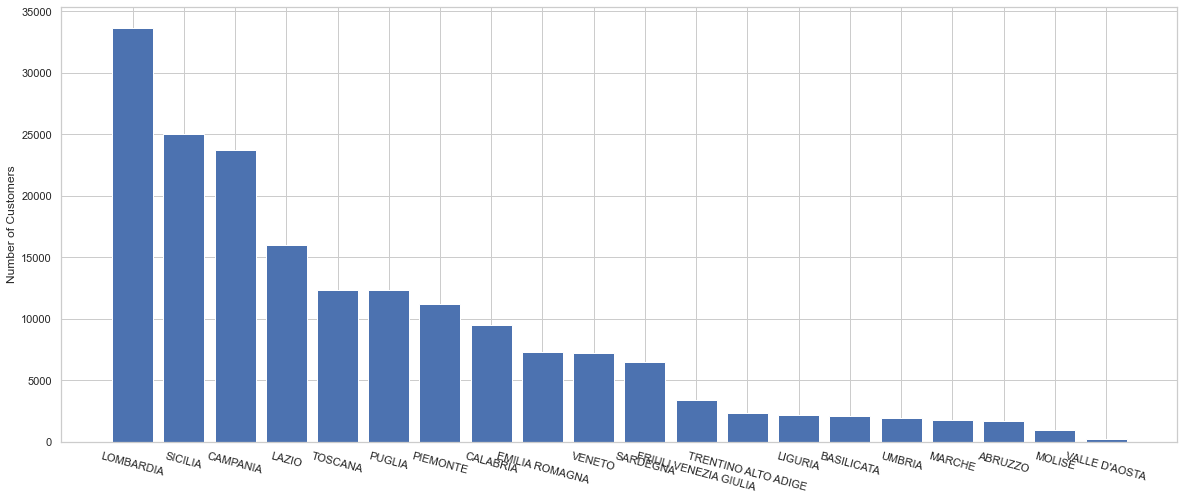

In [371]:
#%%
f = CustomerBase["REGIONE"].value_counts()
ind = f.index
a = pd.DataFrame({"Re":ind,"Num":f})
fig = plt.figure(figsize=(20,8))
plt.bar(a["Re"],a["Num"])
plt.xticks(rotation = -15); # different regions in the file, most them came from LOMBARDIA
#plt.title('Distribution of Customers across Regions')
plt.ylabel('Number of Customers');

#col = ["Category","MaterialGrouping","PrizeDescript","RequestPlace","Product"]
#le = LabelEncoder()
#FullMerge[col] = FullMerge[col].apply(le.fit_transform)

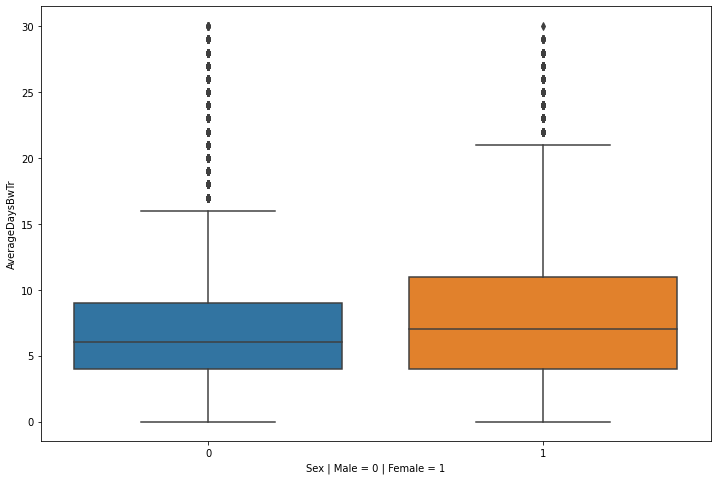

In [179]:
import seaborn as sns
plt.figure(figsize=(12, 8))
#plt.title='Boxplot of Average Days between transaction active and inactive customers'
ax = sns.boxplot(x="SEX", y="AvgDaysBetwTr", data=CustomerBase, order=[0, 1]).set(
    xlabel='Sex | Male = 0 | Female = 1', 
    ylabel='AverageDaysBwTr'
    )
plt.show()

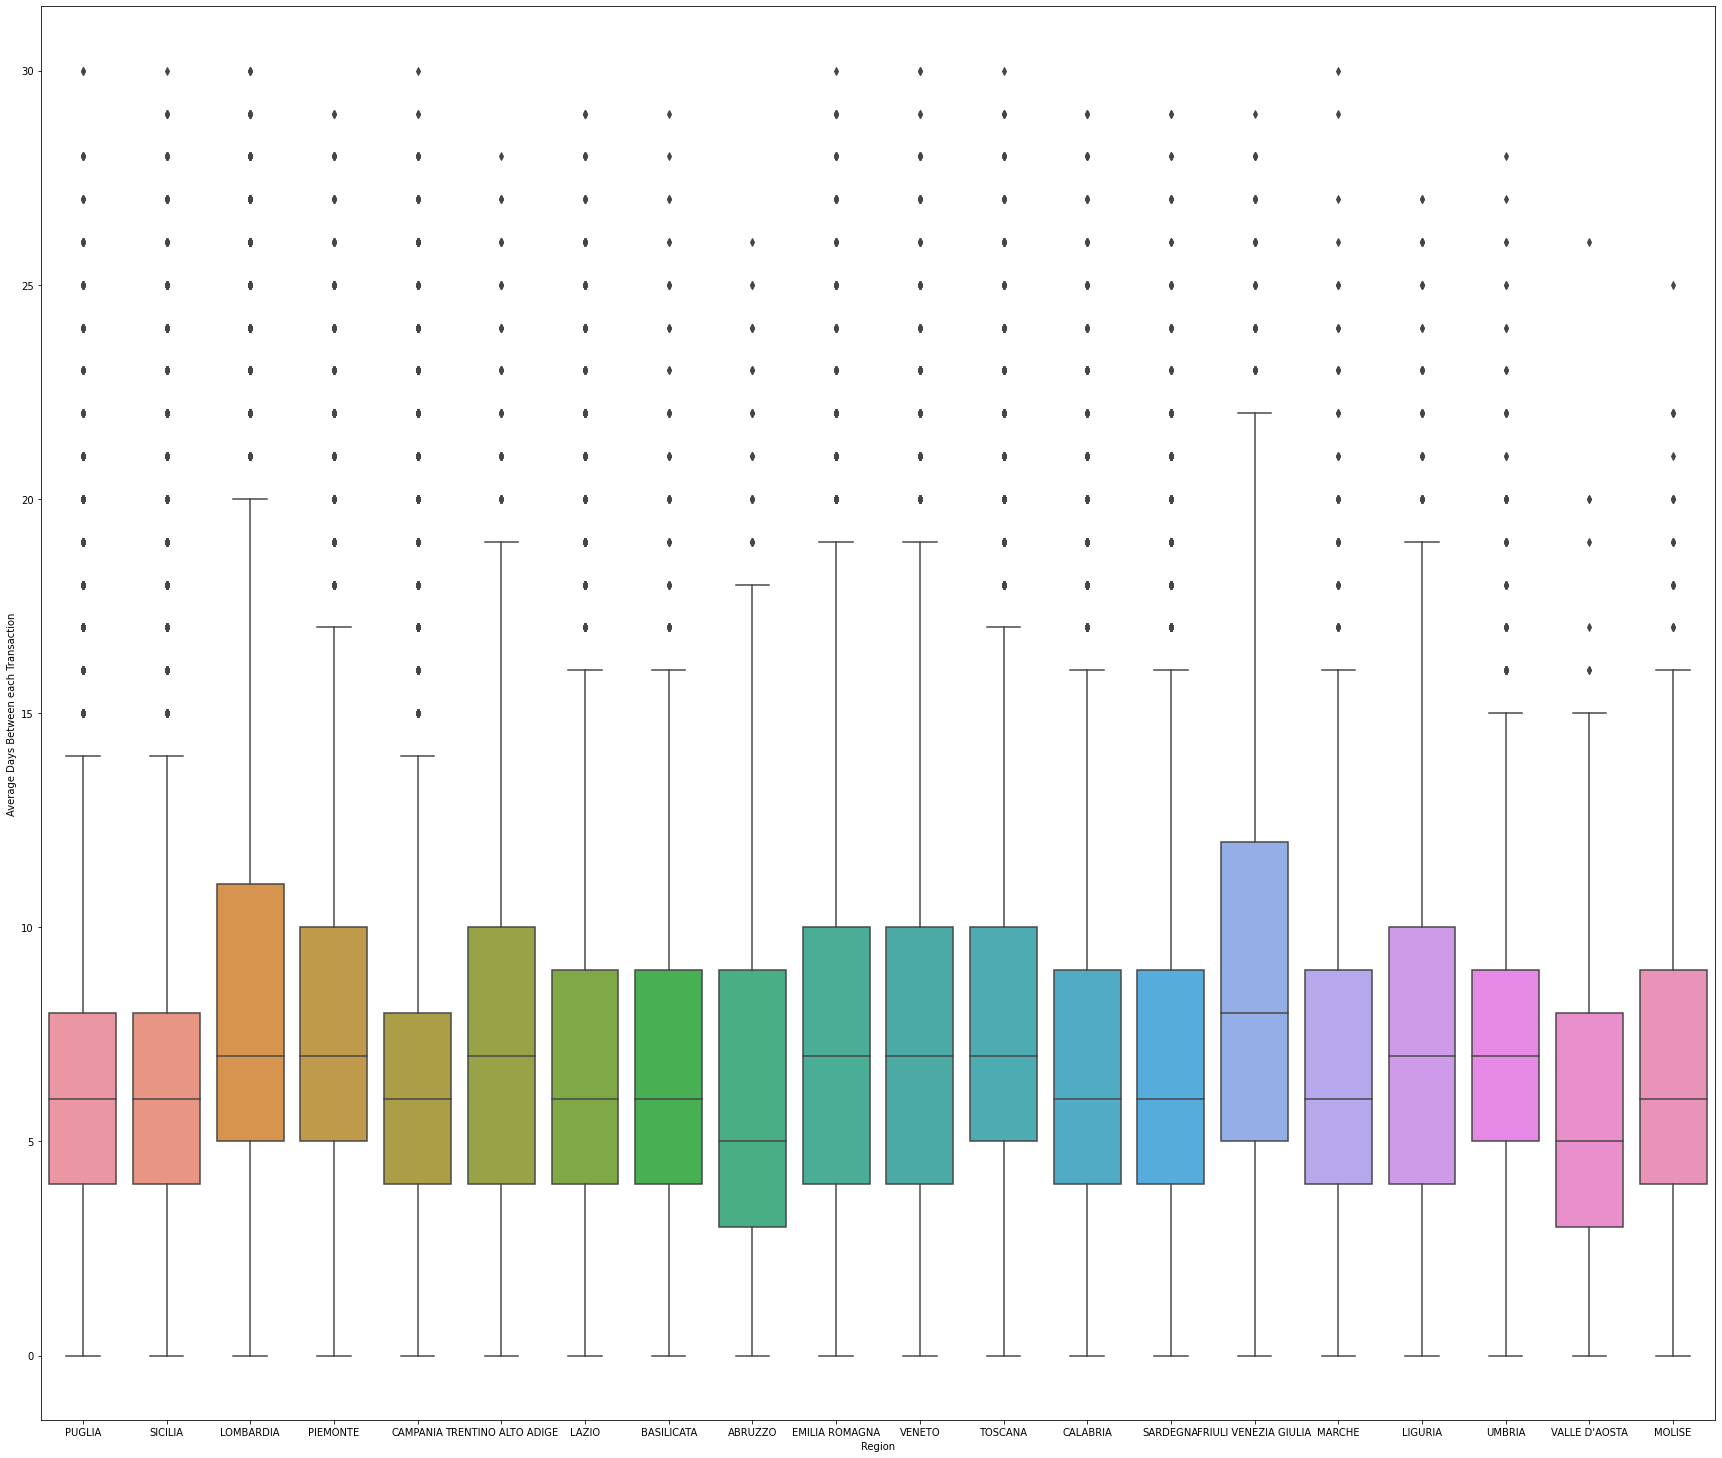

In [180]:
import seaborn as sns
#plt.title='Boxplot of Average amount of Days between each Transaction by region'
plt.figure(figsize=(30, 26))
ax = sns.boxplot(x="REGIONE", y="AvgDaysBetwTr", data=CustomerBase).set(
    xlabel='Region',
    ylabel='Average Days Between each Transaction'
    )
plt.show()

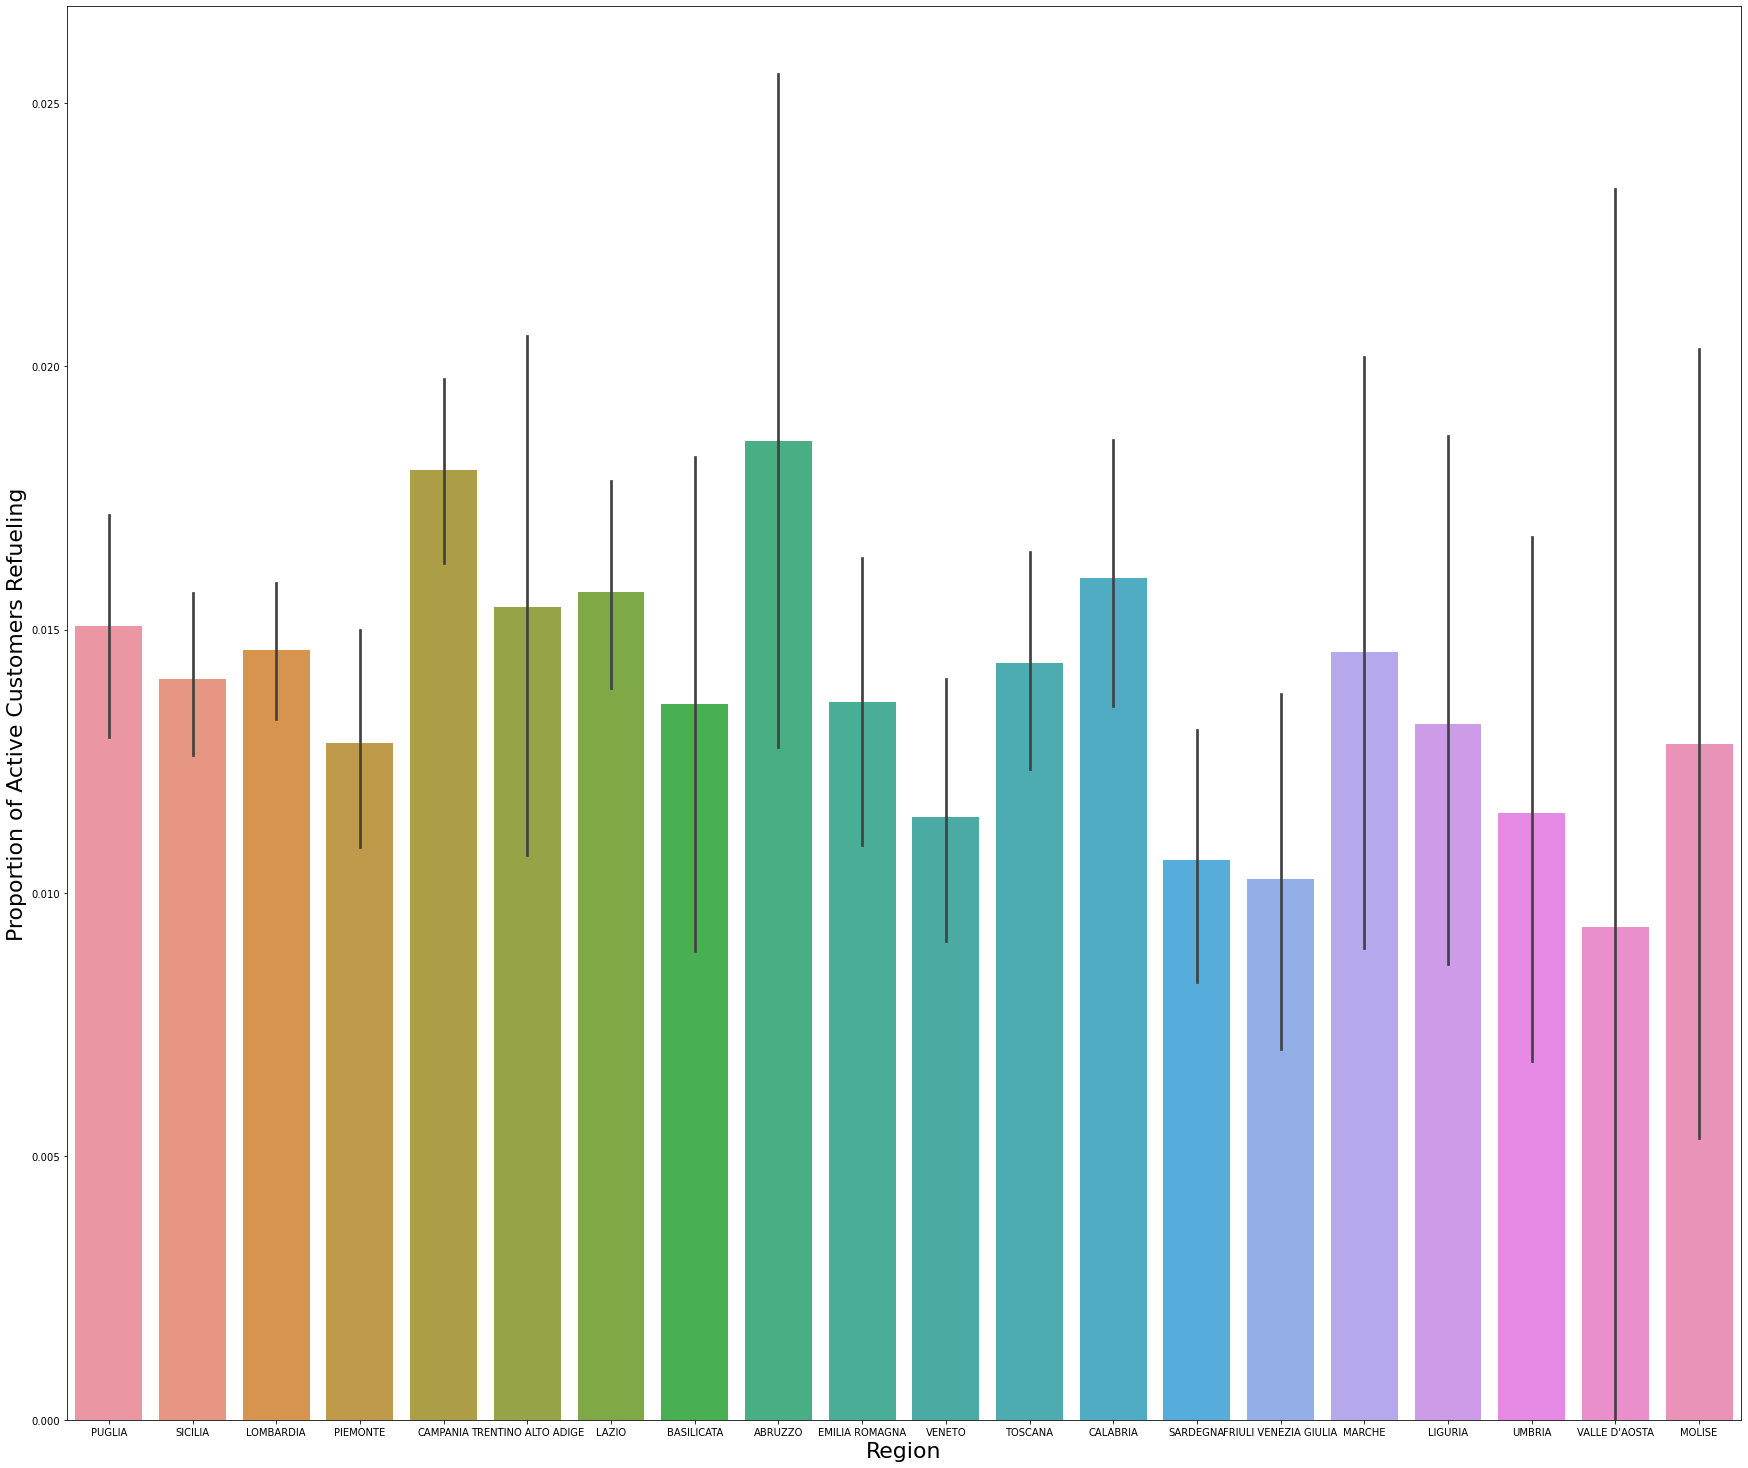

In [181]:
plt.figure(figsize=(30, 26))
sns.barplot(x='REGIONE', y='LoyalRefuel', data=CustomerBase)
plt.ylabel('Proportion of Active Customers Refueling', fontsize=22)
plt.xlabel('Region', fontsize=22)
plt.show()
#ax = sns.countplot(x='SEX', data=CustomerBase)
#sns.set(xlabel='REGIONE', ylabel='Proportion of Customers Active')


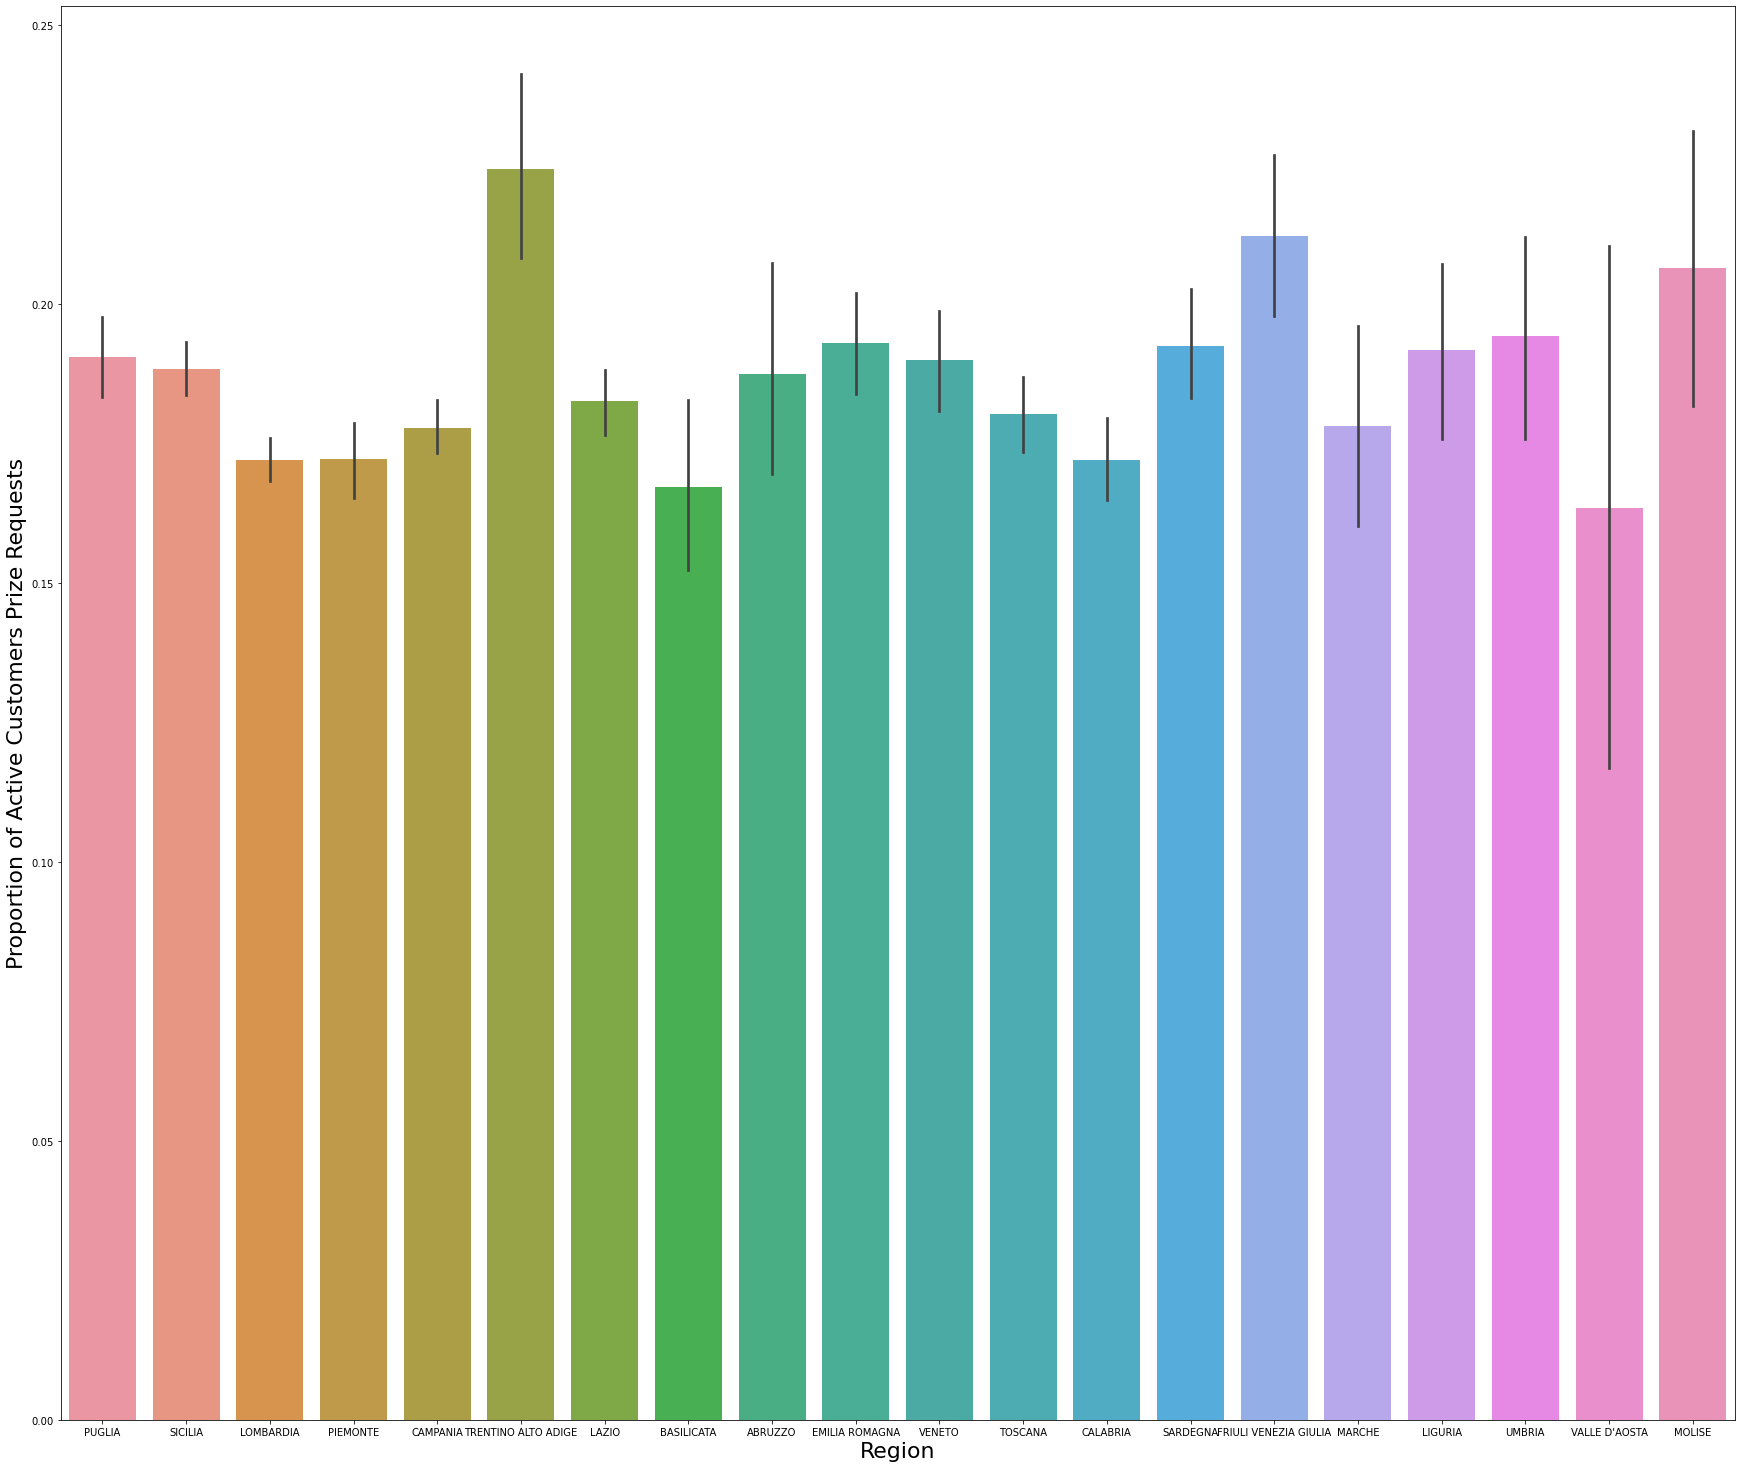

In [182]:
plt.figure(figsize=(30, 26))
sns.barplot(x='REGIONE', y='LoyalPrize', data=CustomerBase)
plt.ylabel('Proportion of Active Customers Prize Requests', fontsize=22)
plt.xlabel('Region', fontsize=22)
plt.show()
#ax = sns.countplot(x='SEX', data=CustomerBase)
#ax.set(xlabel='REGIONE', ylabel='Proportion of Customers Active')


/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


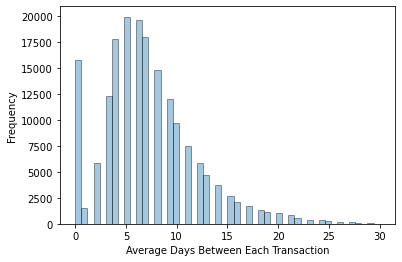

In [183]:
ax = sns.distplot(CustomerBase['AvgDaysBetwTr'], kde = False, norm_hist=False, hist_kws={'ec': 'k'}, label='samples')
ax.set(xlabel='Average Days Between Each Transaction', ylabel='Frequency')
plt.show()

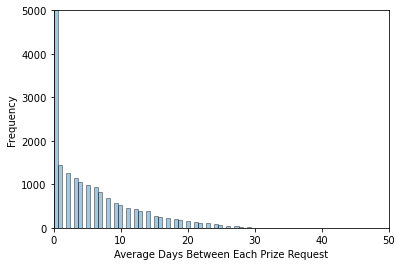

In [184]:
ax = sns.distplot(CustomerBase['AvgDaysBetwReq'], kde = False, norm_hist=False, hist_kws={'ec': 'k'}, label='samples')
ax.set(xlabel='Average Days Between Each Prize Request', ylabel='Frequency')
ax.set_xlim(0, 50)
ax.set_ylim(0, 5000)
plt.show()

[Text(0.5, 0, 'SEX | Male = 0 | Female = 1'), Text(0, 0.5, 'Frequency')]

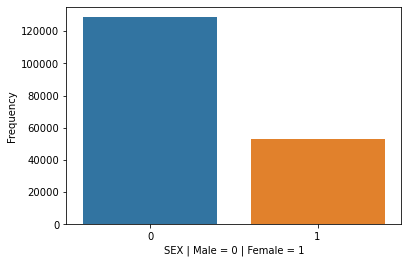

In [185]:
ax = sns.countplot(x='SEX', data=CustomerBase)
ax.set(xlabel='SEX | Male = 0 | Female = 1', ylabel='Frequency')


In [186]:
ReducedBase["Refuel"] = ReducedBase["LoyalRefuel"] * ReducedBase["FreqRefuel"]
ReducedBase["Prize"] = ReducedBase["FreqPrize"] * ReducedBase["LoyalPrize"]

<AxesSubplot:>

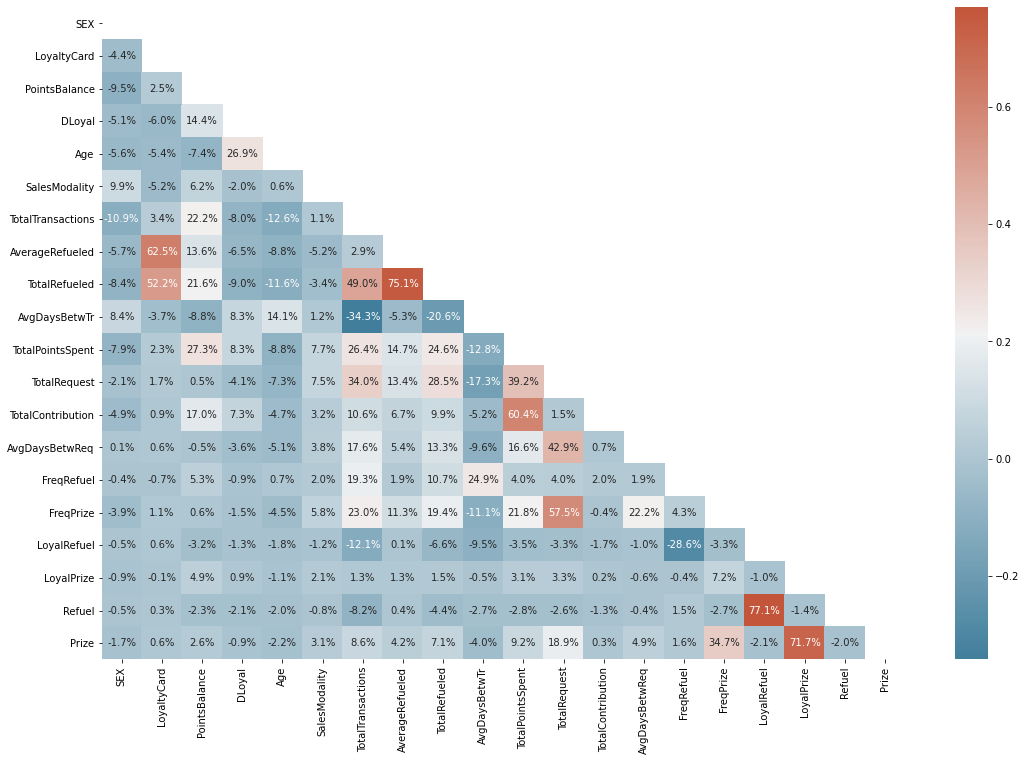

In [187]:
corr = ReducedBase.corr()
f, ax = plt.subplots(figsize=(18, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap, fmt=".1%")

In [188]:
ReducedBase['Refuel'].value_counts()

0    180082
1      1590
Name: Refuel, dtype: int64

In [189]:
ReducedBase['Prize'].value_counts()

0    163008
1     18664
Name: Prize, dtype: int64

In [190]:
ReducedBase['AvgDaysBetwTr'].describe()

count    181672.000000
mean          7.093283
std           4.685826
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          30.000000
Name: AvgDaysBetwTr, dtype: float64

In [191]:
#Recheck this, maybe use a Logisitc regression before this step. How to determine the cutoffs?
#conditions  = [(ReducedBase['AvgDaysBetwTr'] <= 4) & (ReducedBase['AvgDaysBetwTr'] >= 1),
#               (ReducedBase['AvgDaysBetwTr'] > 4) & (ReducedBase['AvgDaysBetwTr'] <= 6),
#                (ReducedBase['AvgDaysBetwTr'] > 6) & (ReducedBase['AvgDaysBetwTr'] <= 9),
#                (ReducedBase['AvgDaysBetwTr'] > 9) | (ReducedBase['AvgDaysBetwTr'] == 0)]
#choices     = [ 1, 2, 3, 4 ] # might want to reverse this order
#ReducedBase['Loyalty'] = pd.Series(np.select(conditions, choices, default=np.nan),index = ReducedBase['AvgDaysBetwTr'].index) 

In [192]:
id = ReducedBase['CustomerCode']
ReducedBase = ReducedBase.drop(columns=['CustomerCode'])

In [193]:
#ReducedBase['Loyalty'].value_counts()

# VI. Main Models  - RFM Analysis - Logistic Regression.

In [372]:
#Now to SL and UL Models, we make a copy of our dataframe for this section
Copy2 = ReducedBase.copy()

In [373]:
df2 = Copy2.sample(frac=0.20, replace=True, random_state=1)

In [374]:
df2.drop(columns=['FreqRefuel','FreqPrize','LoyalRefuel','LoyalPrize'], inplace=True)

In [375]:
df2.head()

,SEX,REGIONE,LoyaltyCard,PointsBalance,DLoyal,Age,SalesModality,TotalTransactions,AverageRefueled,TotalRefueled,AvgDaysBetwTr,TotalPointsSpent,TotalRequest,TotalContribution,AvgDaysBetwReq,Refuel,Prize
5730775,0,3,1,1503,1071,34,4,20,33.700000,674,4,1900,1,5,0,0,0
354271,1,3,1,404,5463,57,4,24,18.458333,443,7,860,2,0,0,0,1
2036278,0,8,1,769,4407,49,4,10,44.900000,449,11,430,1,0,0,0,0
4785469,0,3,1,278,5695,68,4,8,13.750000,110,5,430,1,0,0,0,0
3470651,0,8,1,1053,2160,61,2,17,47.882353,814,9,860,2,0,0,0,0


# VII. RFM Analysis W/ K-means clustering

#rfm_df.head() is Dataset for RFM analysis

In [198]:
rfm_df.head()

,CustomerCode,Recency,Frequency,Monetary
0,7071161603000001313,35,11,308
1,7071161603000001370,27,22,381
2,7071161603000001610,35,27,1259
3,7071161603000001677,32,8,357
4,7071161603000004416,20,10,169


In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [200]:
scaler = StandardScaler()

In [201]:
RFM_norm1 = rfm_df.drop(["CustomerCode"], axis=1)
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [202]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()
# Alternative Normalization of data instead of rank normalization

,Frequency,Amount,Recency
0,0.180635,-0.525172,-0.433769
1,-0.066530,0.190920,-0.374291
2,0.180635,0.516416,0.341076
3,0.087948,-0.720470,-0.393846
4,-0.282799,-0.590271,-0.547022


## Alternative method

In [203]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

## Fist Perform Simple RFM analysis

In [204]:
#Generate normalized ranking variables. 
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
#rfm_df.drop(columns=['R_rank_norm', 'F_rank_norm', 'M_rank_norm'], inplace=True)
 
rfm_df.head()

,CustomerCode,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,7071161603000001313,35,11,308,23.928130,35.780142,31.333942
1,7071161603000001370,27,22,381,33.018138,67.084361,38.481439
2,7071161603000001610,35,27,1259,23.928130,76.618576,78.704478
3,7071161603000001677,32,8,357,27.890505,24.576985,36.205359
4,7071161603000004416,20,10,169,41.858743,32.124103,15.695044


In [205]:
rfm_df['RFM_Score'] = 0.34*rfm_df['R_rank_norm']+0.33 * \
    rfm_df['F_rank_norm']+0.33*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05 #Use a 5-point Scale
rfm_df = rfm_df.round(2)
rfm_df[['CustomerCode', 'RFM_Score']].head(7)

,CustomerCode,RFM_Score
0,7071161603000001313,1.51
1,7071161603000001370,2.30
2,7071161603000001610,2.97
3,7071161603000001677,1.48
4,7071161603000004416,1.50
5,7071161603000004796,2.10
6,7071161603000005140,3.19


In [206]:
#Divide into different sub categories
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerCode', 'RFM_Score', 'Customer_segment']].head()

,CustomerCode,RFM_Score,Customer_segment
0,7071161603000001313,1.51,Lost Customers
1,7071161603000001370,2.30,Low Value Customers
2,7071161603000001610,2.97,Low Value Customers
3,7071161603000001677,1.48,Lost Customers
4,7071161603000004416,1.50,Lost Customers


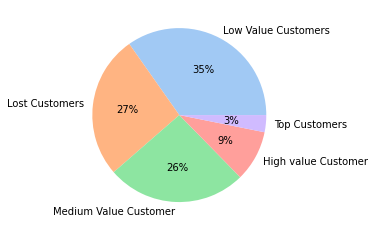

In [207]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index, colors = colors,
        autopct='%.0f%%')
plt.show()

In [208]:
rfm_df.head()

,CustomerCode,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,7071161603000001313,35,11,308,23.93,35.78,31.33,1.51,Lost Customers
1,7071161603000001370,27,22,381,33.02,67.08,38.48,2.30,Low Value Customers
2,7071161603000001610,35,27,1259,23.93,76.62,78.70,2.97,Low Value Customers
3,7071161603000001677,32,8,357,27.89,24.58,36.21,1.48,Lost Customers
4,7071161603000004416,20,10,169,41.86,32.12,15.70,1.50,Lost Customers


In [209]:
# Merge back onto FullMerge to get info on who the top Customer are?
CLUST=rfm_df.merge(FullMerge, on='CustomerCode', how='inner')

In [210]:
TopCustomer = CLUST[CLUST["Customer_segment"] == 'Top Customers']

In [211]:
TopCustomer.head()

,CustomerCode,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,SEX,...,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,AvgDaysBetwReq,FreqRefuel,FreqPrize,LoyalRefuel,LoyalPrize
5410,7071161603000032235,7,36,2472,94.89,88.07,94.57,4.63,Top Customers,0,...,650,0,1950,3,0,0,1,1,0,1
5411,7071161603000032235,7,36,2472,94.89,88.07,94.57,4.63,Top Customers,0,...,650,0,1950,3,0,0,1,1,0,1
5412,7071161603000032235,7,36,2472,94.89,88.07,94.57,4.63,Top Customers,0,...,650,0,1950,3,0,0,1,1,0,0
5413,7071161603000032235,7,36,2472,94.89,88.07,94.57,4.63,Top Customers,0,...,650,0,1950,3,0,0,1,1,0,1
5414,7071161603000032235,7,36,2472,94.89,88.07,94.57,4.63,Top Customers,0,...,650,0,1950,3,0,0,1,1,0,1


In [212]:
TopCustomer['PrizeDescript'].value_counts()

BUONO SCONTO CARB 4E 430 PUNTI           304327
BUONO SCONTO CARB 4E 860 PUNTI           204821
BUONO SCONTO CARB 4E 1290 PUNTI          186920
BUONO SCONTO CARB 4E 2580 PUNTI          153539
CONSEGNA PASTA GAROFALO                   79245
                                          ...  
PRENOTAZIONE ZAINO BATMAN                    41
PRENOTAZIONE BORSA WATERPROOF SEA BAG        39
PRENOTAZIONE MANTEL.BICI L XXL               39
PRENOTAZIONE ARIETE B-CHEESE                 37
ANNULLO PRENOTAZIONE ZAINOCAMPOMARZIO        32
Name: PrizeDescript, Length: 219, dtype: int64

In [213]:
TopBase=TopCustomer.drop_duplicates(subset ="CustomerCode")

In [214]:
TopBase.describe()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,SEX,LoyaltyCard,PointsBalance,...,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,AvgDaysBetwReq,FreqRefuel,FreqPrize,LoyalRefuel,LoyalPrize
count,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,...,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.0,5754.000000,5754.0,5754.000000
mean,7.336809,54.067084,2693.494265,91.737157,94.503055,92.663608,4.647756,0.212548,1.060132,3802.162843,...,1623.599409,3.850886,3944.511992,4.010254,6.725930,1.849844,1.0,0.750087,0.0,0.188912
std,0.591860,19.303823,2830.301000,5.027268,4.493702,4.871992,0.099317,0.409146,0.320566,4903.242753,...,2234.753977,11.603209,3704.861880,3.531005,16.008682,4.573031,0.0,0.433000,0.0,0.391473
min,6.000000,27.000000,1123.000000,76.230000,76.620000,75.590000,4.510000,0.000000,1.000000,0.000000,...,100.000000,0.000000,100.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000
25%,7.000000,42.000000,1995.000000,84.950000,92.320000,89.770000,4.560000,0.000000,1.000000,859.250000,...,430.000000,0.000000,1290.000000,2.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000
50%,7.000000,50.000000,2357.000000,94.890000,95.740000,93.510000,4.630000,0.000000,1.000000,2220.000000,...,430.000000,0.000000,2800.000000,3.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000
75%,8.000000,61.000000,2676.000000,94.890000,98.080000,96.460000,4.720000,0.000000,1.000000,4902.250000,...,1975.000000,0.000000,5185.000000,5.000000,6.000000,0.000000,1.0,1.000000,0.0,0.000000
max,10.000000,265.000000,33939.000000,100.000000,100.000000,100.000000,4.950000,1.000000,3.000000,63002.000000,...,32000.000000,290.000000,41425.000000,39.000000,290.000000,29.000000,1.0,1.000000,0.0,1.000000


Text(0, 0.5, 'Number of Customers')

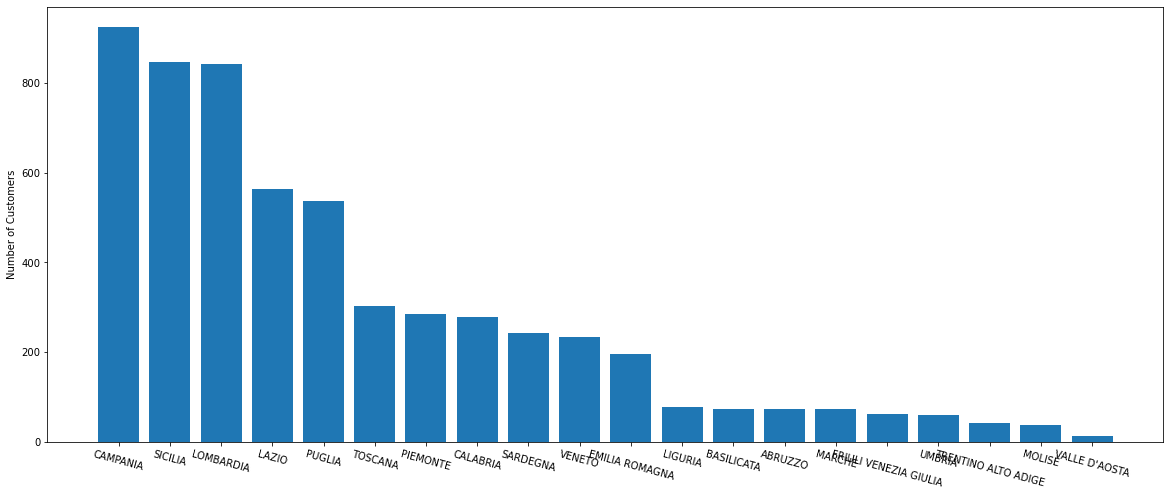

In [215]:
#%%
f = TopBase["REGIONE"].value_counts()
ind = f.index
a = pd.DataFrame({"Re":ind,"Num":f})
fig = plt.figure(figsize=(20,8))
plt.bar(a["Re"],a["Num"])
plt.xticks(rotation = -15); # different regions in the file, most them came from LOMBARDIA
#plt.title('Distribution of Top Customers across Regions')
plt.ylabel('Number of Customers')

#col = ["Category","MaterialGrouping","PrizeDescript","RequestPlace","Product"]
#le = LabelEncoder()
#FullMerge[col] = FullMerge[col].apply(le.fit_transform)

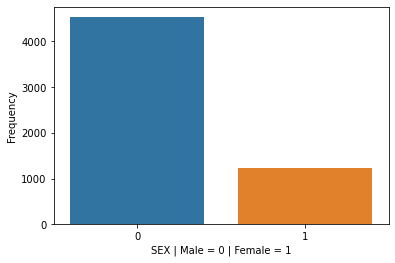

In [216]:
ax = sns.countplot(x='SEX', data=TopBase)
ax.set(xlabel='SEX | Male = 0 | Female = 1', ylabel='Frequency')
#plt.title('Distribution Top Customers Across Gender')
plt.show()

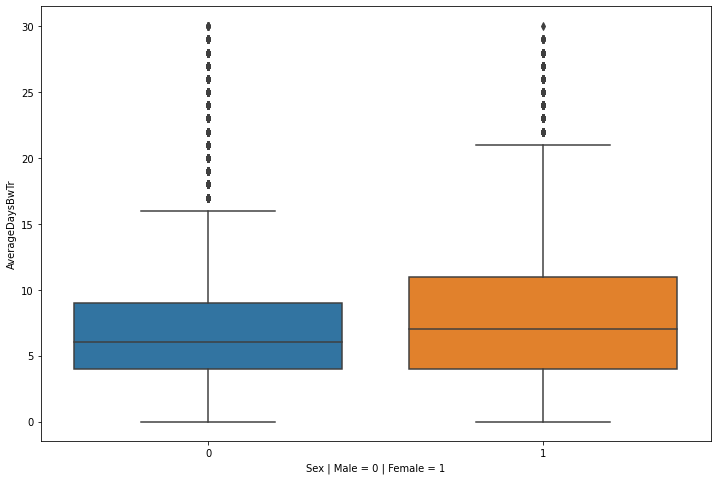

In [217]:
import seaborn as sns
plt.figure(figsize=(12, 8))
#plt.title='Boxplot of Average Days between transaction active and inactive customers'
ax = sns.boxplot(x="SEX", y="AvgDaysBetwTr", data=CustomerBase, order=[0, 1]).set(
    xlabel='Sex | Male = 0 | Female = 1', 
    ylabel='AverageDaysBwTr'
    )
plt.show()

In [218]:
ChurnedCustomers = CLUST[CLUST["Customer_segment"] == 'Lost Customers']

Churned=ChurnedCustomers.drop_duplicates(subset ="CustomerCode")

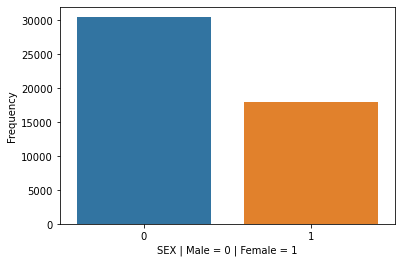

In [219]:
ax = sns.countplot(x='SEX', data=Churned)
ax.set(xlabel='SEX | Male = 0 | Female = 1', ylabel='Frequency')
#plt.title('Distribution Churned/Lost Customers Across Gender')
plt.show()

In [220]:
Churned.describe()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,SEX,LoyaltyCard,PointsBalance,...,PointsRequired,ClientContribution,TotalPointsSpent,TotalRequest,TotalContribution,AvgDaysBetwReq,FreqRefuel,FreqPrize,LoyalRefuel,LoyalPrize
count,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,...,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.000000,48399.00000
mean,62.490361,5.500733,179.890432,19.612095,15.788598,16.936281,0.873377,0.370586,1.011942,915.856939,...,977.453749,1.792744,1357.495072,1.560921,2.221492,0.216575,0.901651,0.344077,0.040559,0.17959
std,43.326230,3.180779,123.037090,15.705220,11.073511,12.546026,0.458415,0.482967,0.122738,1746.957176,...,1278.193685,6.139093,1715.102718,1.097598,7.225037,1.598740,0.297789,0.475071,0.197268,0.38385
min,8.000000,1.000000,1.000000,0.030000,1.320000,0.020000,0.020000,0.000000,1.000000,0.000000,...,100.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,32.000000,3.000000,88.000000,7.190000,6.850000,6.870000,0.480000,0.000000,1.000000,221.000000,...,430.000000,0.000000,430.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,48.000000,5.000000,158.000000,15.560000,13.330000,14.420000,0.910000,0.000000,1.000000,429.000000,...,430.000000,0.000000,860.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,83.000000,8.000000,247.000000,27.890000,24.580000,24.590000,1.280000,1.000000,1.000000,888.000000,...,750.000000,0.000000,1550.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
max,190.000000,27.000000,1530.000000,84.950000,76.620000,83.730000,1.600000,1.000000,3.000000,51515.000000,...,20545.000000,290.000000,32500.000000,50.000000,290.000000,28.000000,1.000000,1.000000,1.000000,1.00000


## K-Means model - Main way to Cluster 

In [221]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [222]:
# Plot 3 graphs together checking for skewness, REMEMBER must Standaridze for K-Means (Euclidean space)
#plt.figure(figsize=(9, 9))

#plt.subplot(3, 1, 1)
#check_skew(rfm_df,'Recency')

#plt.subplot(3, 1, 2)
#check_skew(rfm_df,'Frequency')

#plt.subplot(3, 1, 3)
#check_skew(rfm_df,'Monetary')

#plt.tight_layout()
#plt.savefig('before_transform.png', format='png', dpi=1000)

In [231]:
from scipy import stats

box_re = stats.boxcox(rfm_df['Recency'])[0]
box_fre = stats.boxcox(rfm_df['Frequency'])[0]
box_mon = stats.boxcox(rfm_df['Monetary'])[0]

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

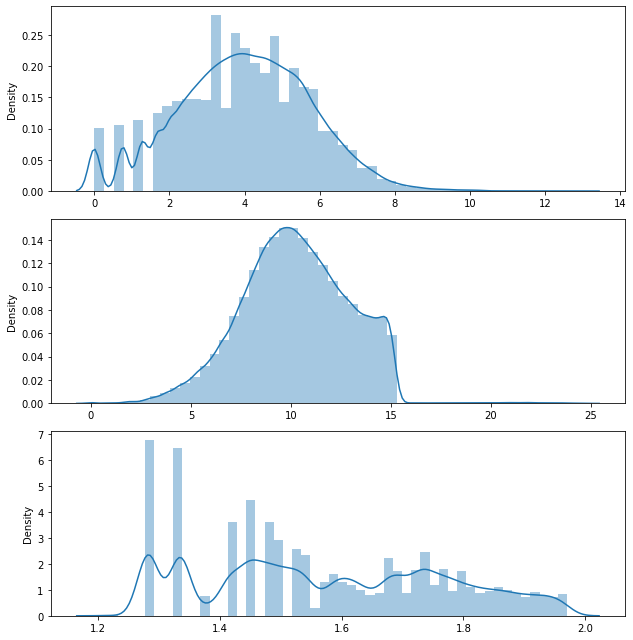

In [232]:
# Plot 3 graphs together checking for skewness
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.distplot(box_fre)

plt.subplot(3, 1, 2)
sns.distplot(box_mon)

plt.subplot(3, 1, 3)
sns.distplot(box_re)

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [234]:
final_df = pd.DataFrame({'Recency': box_re, 
                         'Frequency': box_fre, 
                          'Monetary': box_mon})
final_df.head()

,Recency,Frequency,Monetary
0,1.743851,3.369401,8.944459
1,1.690655,4.822829,9.441404
2,1.743851,5.306793,12.538744
3,1.726199,2.787340,9.287757
4,1.620618,3.189933,7.622267


In [235]:
# Acceptable Skewness now
final_df.skew(axis=0)

Recency      0.146855
Frequency   -0.017678
Monetary     0.016429
dtype: float64

In [236]:
# Import library, as we now want to standardize our variables
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
data_scaled = scaler.fit_transform(final_df)

data_scaled.mean(axis=0).round(2)
data_scaled.std(axis=0).round(2)


data_scaled = pd.DataFrame(data_scaled, columns=final_df.columns)

In [237]:
# find the optimal value of K using elbow method
K_range = range(2,8)
wcss = []
for i in K_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

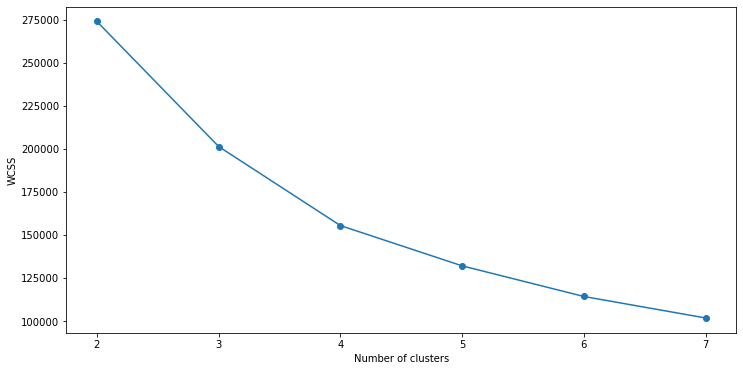

In [238]:
plt.figure(figsize = (12,6))

plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.show()

In [249]:
# Must install before running code below
pip install yellowbrick

SyntaxError: invalid syntax (<ipython-input-249-e9f9654ef109>, line 2)

In [239]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


ModuleNotFoundError: No module named 'yellowbrick'

In [241]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

### Warning Computationally heavy step: Around 3hours runtime. 1 hour if run only uncommented model, or chosen model. Uncomment df_rfm_k3 & df_rfm_k4 to check model with 3 and 4 clusters. Snake plots and other plots that include both these models have been commented out for runtime.

In [ ]:
#df_rfm_k3 = kmeans(data_scaled, 3, final_df)

In [ ]:
#df_rfm_k4 = kmeans(data_scaled, 4, final_df)

In [250]:
df_rfm_k5 = kmeans(data_scaled, 5, final_df)

NameError: name 'TSNE' is not defined

In [244]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=rfm_df.index, 
                                       columns=rfm_df.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerCode', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

In [ ]:
#df_rfm_k3 = kmeans(data_scaled, 3, final_df)

In [ ]:
#plt.figure(figsize=(9, 9))

#plt.subplot(3, 1, 1)
#snake_plot(data_scaled, df_rfm_k3, final_df)

#plt.subplot(3, 1, 2)
#snake_plot(data_scaled, df_rfm_k4, final_df)

#plt.subplot(3, 1, 3)
#snake_plot(data_scaled, df_rfm_k5, final_df)

#plt.tight_layout()

In [246]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new
#rfm_values(df_rfm_k3)

In [247]:
#rfm_values(df_rfm_k4)

In [248]:
rfm_values(df_rfm_k5)

NameError: name 'df_rfm_k5' is not defined

In [251]:
#Make copy of database with cluster values from champion model
df_k5=df_rfm_k5.copy()

NameError: name 'df_rfm_k5' is not defined

In [252]:
df_k5.loc[:,'CustomerCode'] = rfm_df['CustomerCode']

NameError: name 'df_k5' is not defined

In [253]:
ClusterBase=df_k5.merge(rfm_df, how='inner', on='CustomerCode')

NameError: name 'df_k5' is not defined

In [254]:
ClusterBase.drop(columns=['Recency_x','Frequency_x','Monetary_x'], inplace=True)
# These values tell ur nothing as they are normalized. WE keep the other RFM_y values as they can be interpreted.

NameError: name 'ClusterBase' is not defined

In [255]:
ClusterBase.drop(columns=['RFM_Level'], inplace=True)
ClusterBase.drop(columns=['RFM_Level'], inplace=True)

NameError: name 'ClusterBase' is not defined

In [256]:
ClusterBase.tail()

NameError: name 'ClusterBase' is not defined

In [257]:
# reducing number of features to 2 using principal component analysis
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-0.94214799,  0.41697622],
       [-0.17995946,  0.47868495],
       [ 0.54886554,  1.29673176],
       ...,
       [-0.59569366,  0.46792685],
       [-0.72495012,  0.38942176],
       [-0.86802763,  0.2354773 ]])

In [258]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.942148,0.416976
1,-0.179959,0.478685
2,0.548866,1.296732
3,-1.027344,0.313096
4,-0.988474,-0.365914


In [259]:
#Concatenate the clusters labels to the datafram
#pca_cluster_df = pd.concat([pca_df, pd.DataFrame({'clusters': cluster_labels})], axis=1)
#pca_cluster_df

In [260]:
#plt.figure(figsize=(15,10))
#sns.scatterplot(x='pca1', y='pca2', hue = 'clusters', data = pca_cluster_df,
#                palette =['red','green','blue'], s=100)
#plt.legend(fontsize=12)
#plt.show()

In [351]:
# concatenate clusters to the original dataframe
data_cluster = pd.concat([final_df.reset_index(), pd.DataFrame({'Clusters': cluster_labels})], axis=1)


IndentationError: unexpected indent (<ipython-input-351-c872ae8c31d4>, line 6)

In [262]:
import plotly.graph_objects as go
from plotly import graph_objects
import mpl_toolkits

ModuleNotFoundError: No module named 'plotly'

In [263]:
plt.rcParams['figure.figsize'] = (25,25)
fig=plt.figure(1)
plt.clf()
ax=mpl_toolkits.mplot3d.axes3d.Axes3D(fig,
         rect = [0, 0, .95, 1],
         elev = 48,
         azim = 134)
plt.cla()
ax.scatter(df_k5['Frequency'], df_k5['Recency'], df_k5['Monetary'],
          c = df_k5['Cluster'],
          s=200,
          cmap='spring',
          alpha=0.5,
          edgecolor = 'darkgrey')

ax.set_xlabel('Frequency',
             fontsize = 22)
ax.set_ylabel('Recency',
             fontsize = 22)
ax.set_zlabel('Monetary',
             fontsize = 22)

plt.show()

NameError: name 'mpl_toolkits' is not defined

<Figure size 1800x1800 with 0 Axes>

NameError: name 'ClusterBase' is not defined

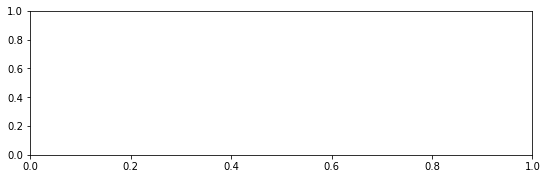

In [264]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Frequency_y', data=ClusterBase)

plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Monetary_y', data=ClusterBase)

plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Recency_y', data=ClusterBase)

plt.tight_layout()


NameError: name 'ClusterBase' is not defined

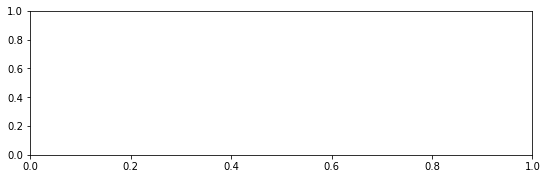

In [265]:
#Can also exclude outliers
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Frequency_y', data=ClusterBase, showfliers=False, order=[0, 1, 2 ,3, 4]).set( 
    ylabel='Frequency (# of Transactions)'
    )

plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Monetary_y', data=ClusterBase, showfliers=False, order=[0, 1, 2 ,3, 4]).set( 
    ylabel='Monetary (Total # of Liters)'
    )

plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Recency_y', data=ClusterBase, showfliers=False, order=[0, 1, 2 ,3, 4]).set(
    xlabel='0 = Top Customers | 1 = Low-Value Churning | 2 = Lost/Churning | 3 = High-Value churning, 4= Low-Value',
    ylabel='Recency (Days since Last Transaction)'
    )

plt.tight_layout()


In [ ]:
ClusterBase['Cluster'].value_counts()

In [ ]:
Top=ClusterBase[ClusterBase['Cluster']==0]

In [ ]:
One=ClusterBase[ClusterBase['Cluster']==1]

In [266]:
Three=ClusterBase[ClusterBase['Cluster']==3]

NameError: name 'ClusterBase' is not defined

In [267]:
Four=ClusterBase[ClusterBase['Cluster']==4]

NameError: name 'ClusterBase' is not defined

In [268]:
Bot=ClusterBase[ClusterBase['Cluster']==2]

NameError: name 'ClusterBase' is not defined

In [269]:
Top=Top.merge(CustomerBase, how='inner', on='CustomerCode')

NameError: name 'Top' is not defined

In [270]:
Bot=Bot.merge(CustomerBase, how='inner', on='CustomerCode')

NameError: name 'Bot' is not defined

In [271]:
One=One.merge(CustomerBase, how='inner', on='CustomerCode')
Three=Three.merge(CustomerBase, how='inner', on='CustomerCode')
Four=Four.merge(CustomerBase, how='inner', on='CustomerCode')

NameError: name 'One' is not defined

In [272]:
Top.describe()
#0.19 LoyalPrize
# LoyalRefuel = 0.0003

NameError: name 'Top' is not defined

In [273]:
Bot.info()
#Bot=0.18 Loyalprize
#Loyal Refuel = 0.07

NameError: name 'Bot' is not defined

In [274]:
Top.drop(columns=['R','F','M','score','RFM_Concat','R_rank_norm','F_rank_norm','M_rank_norm'], inplace = True)
Bot.drop(columns=['R','F','M','score','RFM_Concat','R_rank_norm','F_rank_norm','M_rank_norm'], inplace = True)

NameError: name 'Top' is not defined

In [275]:
Bot.info()

NameError: name 'Bot' is not defined

In [276]:
Top['Product'].value_counts()

NameError: name 'Top' is not defined

In [277]:
Bot['Product'].value_counts()

NameError: name 'Bot' is not defined

NameError: name 'Top' is not defined

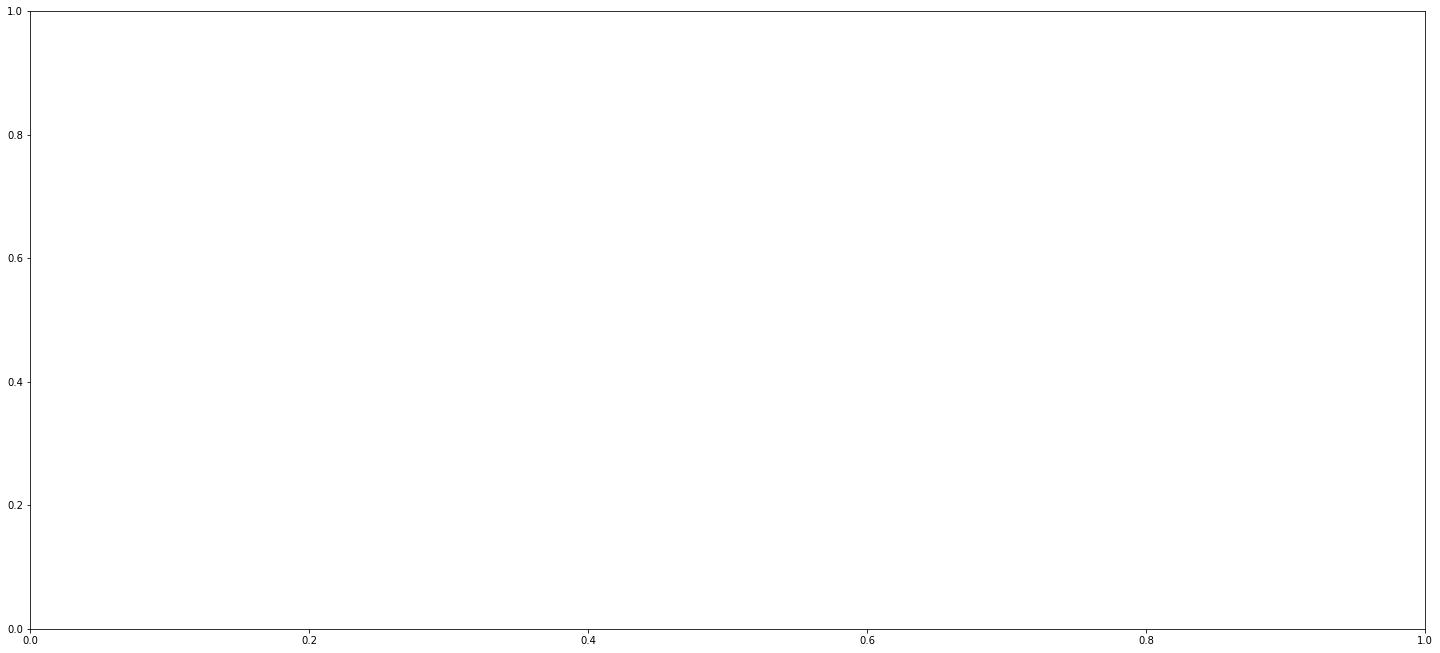

In [278]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
ax = sns.countplot(x='Product', data=Top)
ax.title.set_text('Top Customers')

plt.subplot(2, 1, 2)
ax = sns.countplot(x='Product', data=Bot)
ax.title.set_text('Churning Customers')

plt.tight_layout()


NameError: name 'Top' is not defined

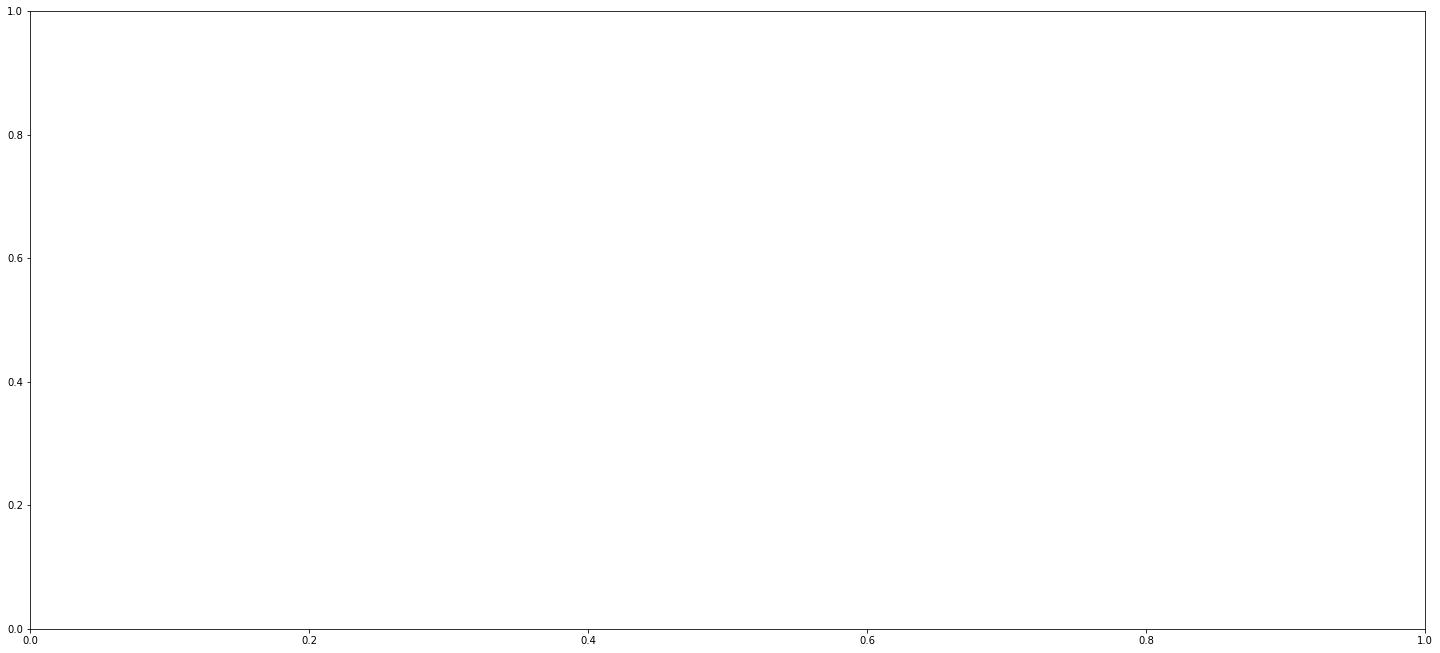

In [279]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
ax = sns.countplot(x='Category', data=Top)
ax.title.set_text('Top Customers')

plt.subplot(2, 1, 2)
ax = sns.countplot(x='Category', data=Bot)
ax.title.set_text('Churning Customers')

plt.tight_layout()


In [280]:
plt.hist(Top['Age'])

NameError: name 'Top' is not defined

In [281]:
plt.hist(Bot['Age'])

NameError: name 'Bot' is not defined

In [282]:
Four['Category'].value_counts()

NameError: name 'Four' is not defined

In [283]:
Three['Product'].value_counts()

NameError: name 'Three' is not defined

In [284]:
Four['Category'].value_counts()

NameError: name 'Four' is not defined

In [285]:
Four['RequestPlace'].value_counts()

NameError: name 'Four' is not defined

In [286]:
Bot['RequestPlace'].value_counts()

NameError: name 'Bot' is not defined

In [287]:
One['REGIONE'].value_counts()

NameError: name 'One' is not defined

In [288]:
Bot['REGIONE'].value_counts()

NameError: name 'Bot' is not defined

# VII. Logistic Regression

In [376]:
Copy=ReducedBase

In [377]:
#id = Copy['CustomerCode']
#Copy = Copy.drop(columns=['CustomerCode'])

In [378]:
Copy2=Copy.fillna(0)
Copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181672 entries, 0 to 9380125
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                181672 non-null  int64  
 1   REGIONE            181672 non-null  int64  
 2   LoyaltyCard        181672 non-null  int64  
 3   PointsBalance      181672 non-null  int64  
 4   DLoyal             181672 non-null  int64  
 5   Age                181672 non-null  int64  
 6   SalesModality      181672 non-null  int64  
 7   TotalTransactions  181672 non-null  int64  
 8   AverageRefueled    181672 non-null  float64
 9   TotalRefueled      181672 non-null  int64  
 10  AvgDaysBetwTr      181672 non-null  int64  
 11  TotalPointsSpent   181672 non-null  int64  
 12  TotalRequest       181672 non-null  int64  
 13  TotalContribution  181672 non-null  int64  
 14  AvgDaysBetwReq     181672 non-null  int64  
 15  FreqRefuel         181672 non-null  int64  
 16  F

In [380]:
Copy2#Carefuel i dont think we can convert it to an integer!
Copy2['AverageRefueled']=Copy2['AverageRefueled'].astype(int)

In [381]:
df = Copy2.drop(['FreqRefuel','FreqPrize','LoyalRefuel','LoyalPrize','LoyaltyCard'],axis=1)

In [382]:
df

,SEX,REGIONE,PointsBalance,DLoyal,Age,SalesModality,TotalTransactions,AverageRefueled,TotalRefueled,AvgDaysBetwTr,TotalPointsSpent,TotalRequest,TotalContribution,AvgDaysBetwReq,Refuel,Prize
0,0,12,940,417,48,2,13,12,165,3,1700,1,5,0,0,0
13,0,14,584,240,36,4,31,27,851,5,860,2,0,0,0,0
75,1,14,1099,433,56,4,7,15,109,7,650,1,0,0,0,0
82,0,8,812,2433,51,2,8,42,337,18,430,1,0,0,0,0
90,1,11,581,2471,54,4,6,44,266,6,715,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379978,1,8,337,1083,48,2,25,30,754,3,430,1,0,0,0,0
9380003,1,8,583,244,49,2,29,39,1135,5,700,2,0,0,0,0
9380061,0,11,394,2476,82,4,13,32,423,11,860,2,0,0,0,0
9380087,0,6,630,1088,31,4,38,56,2144,4,3200,1,19,0,0,0


In [383]:
df2 = df.sample(frac=0.20, replace=True, random_state=1)

In [384]:
y = df2['Prize']
y.value_counts()

0    32647
1     3687
Name: Prize, dtype: int64

In [385]:
X = df2.drop('Prize',axis=1) 

In [390]:
X = X.drop(['REGIONE'],axis=1)

KeyError: "['REGIONE'] not found in axis"

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42,shuffle=True)

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:
y_train.value_counts()

0    26132
1     2935
Name: Prize, dtype: int64

In [394]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29067 entries, 3287572 to 1005227
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SEX                29067 non-null  int64
 1   PointsBalance      29067 non-null  int64
 2   DLoyal             29067 non-null  int64
 3   Age                29067 non-null  int64
 4   SalesModality      29067 non-null  int64
 5   TotalTransactions  29067 non-null  int64
 6   AverageRefueled    29067 non-null  int64
 7   TotalRefueled      29067 non-null  int64
 8   AvgDaysBetwTr      29067 non-null  int64
 9   TotalPointsSpent   29067 non-null  int64
 10  TotalRequest       29067 non-null  int64
 11  TotalContribution  29067 non-null  int64
 12  AvgDaysBetwReq     29067 non-null  int64
 13  Refuel             29067 non-null  int64
dtypes: int64(14)
memory usage: 3.3 MB


In [395]:
#compute predictive probabilities.
clf = LogisticRegression(solver='liblinear', class_weight='balanced')
clf.fit(X_train, y_train)
a=clf.predict_proba(X_train)[:,1]

In [396]:
b=pd.Series(a).array

In [397]:
test=pd.DataFrame(data=b)
test

,0
0,0.337580
1,0.343081
2,0.361793
3,0.450802
4,0.360704
...,...
29062,0.502517
29063,0.314181
29064,0.315383
29065,0.341742


In [398]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [407]:
log_reg=LogisticRegression(solver='liblinear', class_weight={0:1,1:9})

log_reg.fit(X_train,y_train)
log_reg.coef_
log_reg.intercept_
y_pred=log_reg.predict(X_train)
result=y_train-y_pred
pd.Series(result).value_counts()

 0    22143
-1     5544
 1     1380
Name: Prize, dtype: int64

In [408]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

array([[20588,  5544],
       [ 1380,  1555]])

In [414]:
# compute Predictive probabilities.
a=log_reg.predict_proba(X_train)
a
#logistic_model.predict_proba(data)[:,1]

array([[0.66204872, 0.33795128],
       [0.65547491, 0.34452509],
       [0.63635392, 0.36364608],
       ...,
       [0.68599808, 0.31400192],
       [0.65638389, 0.34361611],
       [0.66066574, 0.33933426]])

Text(0.5, 1588.0, 'Predicted label')

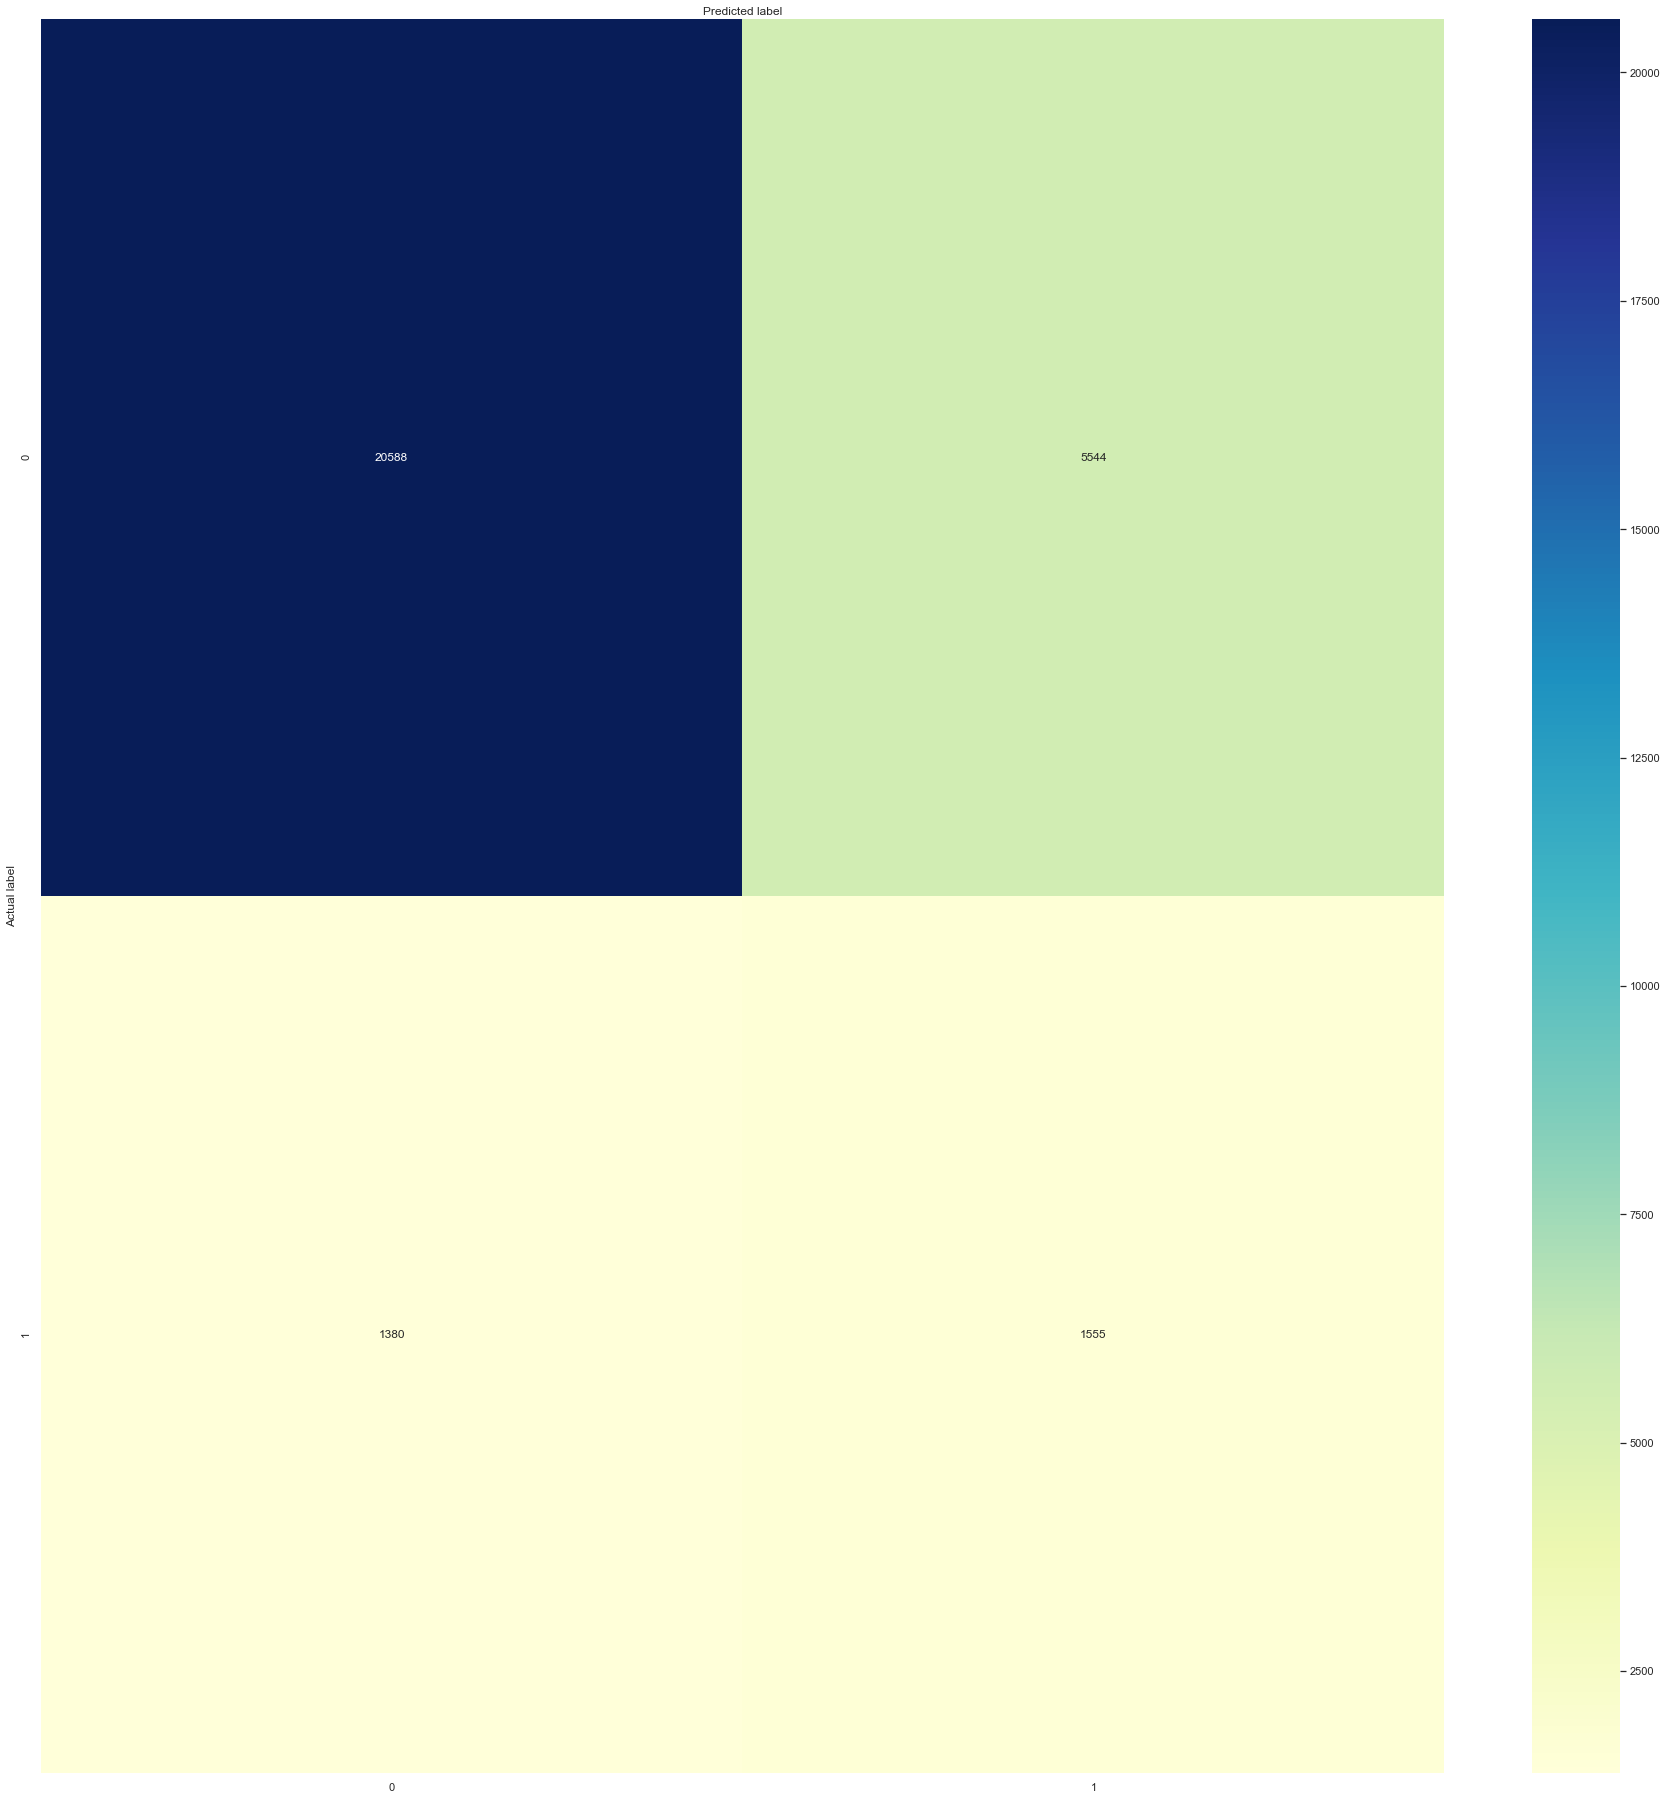

In [412]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [415]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))

Accuracy: 0.7617917225719889
Precision: 0.2190449359064657
Recall: 0.5298126064735945


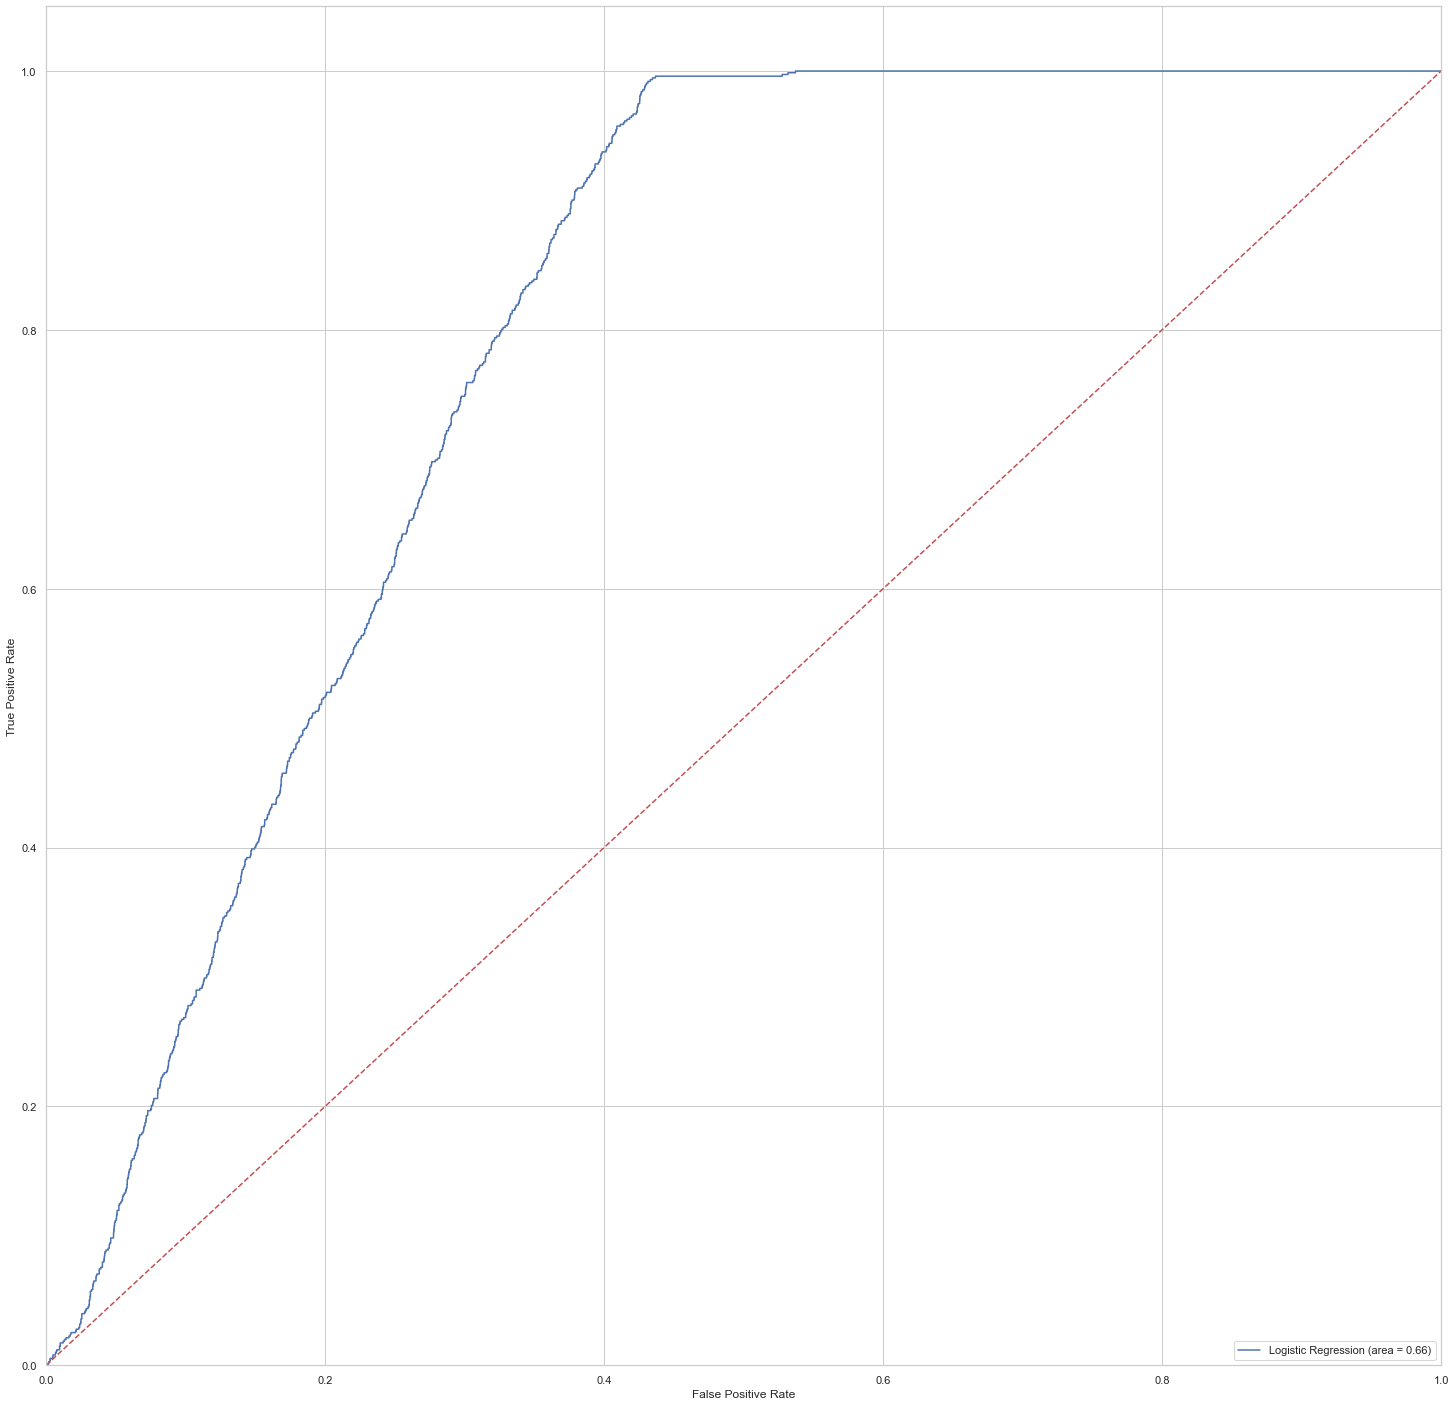

In [417]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature Selection Must also be done with the Logisitc Regression

In [418]:
X_train.drop(columns=['TotalPointsSpent'],inplace=True)

In [419]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
result.summary2() 

Optimization terminated successfully.
         Current function value: 0.323372
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.012     
Dependent Variable:  Prize            AIC:              18824.9066
Date:                2022-01-15 23:38 BIC:              18932.5122
No. Observations:    29067            Log-Likelihood:   -9399.5   
Df Model:            12               LL-Null:          -9511.2   
Df Residuals:        29054            LLR p-value:      4.4078e-41
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
SEX               -0.2486   0.0445  -5.5850 0.0000 -0.3358 -0.1613
PointsBalance      0.0000   0.0000   3.1915 0.0014  0.0000  0.0000
DLoyal            -0.0000   0.0000  -1.1493 0.2504 -0.0000  0.0000
Age               -0.0242   0.0012 -20.5581 0.0000 -0.0266 -0.0219
SalesModality     -0.1806   0.0175 -10.3110 0.0000 -0.2150 -0.1463
TotalTransactions -0.0151   0.0018  -8.1669 0.0000 -0.0187 -0.0115
AverageRefueled   -0.0081   0.0011  -7.1350 0.0000 -0.0103 -0.0058
TotalRefueled      0.0002   0.0000   5.9366 0.0000  0.0001  0.0003
AvgDaysBetwTr     -0.0366   0.0047  -7.7523 0.0000 -0.0459 -0.0273
TotalRequest       0.2032   0.0096  21.1499 0.0000  0.1844  0.2221
TotalContribution -0.0037   0.0021  -1.7930 0.0730 -0.0077  0.0003
AvgDaysBetwReq    -0.0309   0.0079  -3.8887 0.0001 -0.0464 -0.0153
Refuel            -1.4888   0.3862  -3.8555 0.0001 -2.2457 -0.7320
==================================================================

"""

# Hyperparameter Tuning

In [420]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X    # independent variables
y    # dependent variables
X = sm.add_constant(X)
# fit the regression model
reg = sm.OLS(y, X).fit()
# get Variance Inflation Factor (VIF) To see multicolinearity problem
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,SEX,1.041499
1,PointsBalance,1.181851
2,DLoyal,1.136677
3,Age,1.126744
4,SalesModality,1.032179
5,TotalTransactions,2.534541
6,AverageRefueled,3.873670
7,TotalRefueled,5.233084
8,AvgDaysBetwTr,1.161394
9,TotalPointsSpent,2.210818


In [421]:
# Assess P-values of model, feature Selection
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.313626
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.045      
Dependent Variable: Prize            AIC:              22820.5706 
Date:               2022-01-15 23:38 BIC:              22948.0782 
No. Observations:   36334            Log-Likelihood:   -11395.    
Df Model:           14               LL-Null:          -11929.    
Df Residuals:       36319            LLR p-value:      5.8292e-219
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -2.9188   0.1063 -27.4645 0.0000 -3.1271 -2.7105
SEX               -0.1206   0.0407  -2.9661 0.0030 -0

In [422]:
from sklearn.model_selection import RandomizedSearchCV # Use RandomizedSearchCV for hyperparameter tuning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression(class_weight='balanced')

In [423]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']#several hyperparameters, might need more?
penalty = ['l2','l1']
c_values = [2.0,1.5,1.0, 0.1,0.01]

In [424]:
random_grid = {'solvers': solvers,
               'penalty': penalty,
               'c_values': c_values}

print(random_grid)

{'solvers': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2', 'l1'], 'c_values': [2.0, 1.5, 1.0, 0.1, 0.01]}


In [425]:
best_model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                                       n_iter = 100, cv = 2, random_state=42, n_jobs = -1)

In [426]:
random_grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=random_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", 

In [427]:
grid_result.best_score_ 

0.7626401232424002

In [428]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [440]:
log_reg = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',class_weight={0:1,1:9})#new model

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_train)

In [435]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values
x = X_train
y = y_train
model = LogisticRegression(C=0.1,penalty='l1',solver='liblinear',class_weight='balanced').fit(x, y)
v = pd.DataFrame(np.transpose(model.coef_), columns=['Coefficient'])
a = pd.DataFrame(np.transpose(np.exp(model.coef_)), columns=['Odds Ratio'])
#col=X_train
G=pd.DataFrame()
pval=logit_pvalue(model, x)

# compare with statsmodels
#import statsmodels.api as sm
#sm_model = sm.Logit(y, sm.add_constant(x)).fit(disp=0)
#print(sm_model.pvalues)
#sm_model.summary()

In [436]:
# Retrieve REsults Summary w p-values
Names=pd.Series(X_train.columns)
C=pd.DataFrame(Names, columns=['Variables'])
j=pd.concat([C.reset_index(drop=True),v.reset_index(drop=True)],axis=1)
f = pd.concat([j.reset_index(drop=True),a.reset_index(drop=True)], axis=1)
G=pd.DataFrame(pval, columns=['P-Values'])
ResultsOUT=pd.concat([f.reset_index(drop=True),G.reset_index(drop=True)], axis=1)
ResultsOUT['P-Values']=ResultsOUT['P-Values'].round(5)
ResultsOUT.drop(ResultsOUT.tail(1).index,inplace=True)
ResultsOUT

,Variables,Coefficient,Odds Ratio,P-Values
0,SEX,-0.086243,0.917372,0.00000
1,PointsBalance,0.000025,1.000025,0.00209
2,DLoyal,0.000008,1.000008,0.00000
3,Age,-0.001339,0.998662,0.29530
4,SalesModality,0.018329,1.018498,0.15487
5,TotalTransactions,0.005057,1.005070,0.14358
6,AverageRefueled,0.003092,1.003096,0.00038
7,TotalRefueled,-0.000131,0.999869,0.00001
8,AvgDaysBetwTr,-0.000033,0.999967,0.00000
9,TotalRequest,0.473839,1.606149,0.99061


In [437]:
Loyal=df2[df2['Prize']==1]
UnLoyal=df2[df2['Prize']==0]

In [438]:
Loyal.drop(columns=['REGIONE','DLoyal'], inplace=True)
UnLoyal.drop(columns=['REGIONE','DLoyal'], inplace=True)

/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [439]:
d=pd.DataFrame()
d['Prize = 0']=UnLoyal.mean()
d['Prize = 1']=Loyal.mean()
d.head(15)

,Prize = 0,Prize = 1
SEX,0.297883,0.268240
PointsBalance,1832.279811,2109.217521
Age,54.838821,53.744508
SalesModality,2.952951,3.046922
TotalTransactions,18.585689,22.820721
AverageRefueled,42.034337,47.043396
TotalRefueled,809.627470,1067.068891
AvgDaysBetwTr,7.175361,6.538378
TotalPointsSpent,1990.829448,2684.311635
TotalRequest,2.008393,3.258205


# End Of NoteBook